# Data 607: Project

Riki Enquist, Crystal Wai, Niza Ngwira

April 08 2024

# Introduction
The domain of our data is the weather and climate data and electrical pricing of Spain. We will be investigating how to forecast electricity pricing. This will give us insight on how generation, consumption, and weather affect pricing. The variables that are of interest are the generation of energy from different resources such as fossil fuels, geothermal, hydro, marine, nuclear, waste, wind, coal, solar, and price. And the variables of interest from the weather data are city name, temperature, humidity, pressure, wind speed, and wind degree. The weather data was collected by various sensors in different cities of Spain, and the pricing data was collected by the ENTOSE transparency platform where they are the central collection and publication of electricity generation, transportation and consumption data and information for the pan-European market.  

# Dataset

To create our model we will use 2 datasets related to energy consumption, weather data and price in Spain. The dataset regarding electrical consumption, generation and weather was collected from the open source Spanish data suppository ENTOSE (https://transparency.entsoe.eu/dashboard/show). The dataset that included energy prices is from a public Spanish repository named TSO Red Electric España (Markets and prices | ESIOS electricity · data · transparency). Both datasets are available through open source databases and will be calculated over a time period of Jan 1st 2015 to Dec 31st 2018. To visually inspect the data we will use descriptive statistics such as distribution plots, box plots, and scatter plots.
The features in the dataset include:
### Energy Dataset:
1. Generation biomass
2. Generation fossil brown coal/lignite
3. Generation fossil coal-derived gas
4. Generation fossil gas
5. generation fossil oil shale                  
6. generation fossil peat                       
7. generation geothermal                        
8. generation hydro pumped storage aggregated  
9. generation hydro pumped storage consumption  
10. generation hydro run-of-river and poundage  
11. generation hydro water reservoir           
12. generation marine                            
13. generation nuclear                           
14. generation other                            
15. generation other renewable                  
16. generation solar                             
17. generation waste                          
18. generation wind offshore                   
19. generation wind onshore                      
20. forecast solar day ahead                   
21. forecast wind offshore eday ahead            
22. forecast wind onshore day ahead              
23. total load forecast                          
24. total load actual                            
25. price day ahead                              
26. price actual

### Weather dataset:
1. dt_iso  
2. city_name     
3. temp          
4. pressure      
5. humidity      
6. wind_speed    
7. wind_deg      
8. rain_1h       
9. rain_3h       
10. snow_3h       
11. clouds_all



In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns

# Data Preparation

## Energy Dataset Cleaning

We will first start with importing and cleaning the energy dataset.




In [ ]:
from google.colab import drive

df_energy = pd.read_csv('/content/energy_dataset.csv')

df_energy

time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
0                        0.0  ...             196.0                       0.0   
1                        0.0  ...             195.0                       0.0   
2                        0.0  ...             196.0                       0.0   
3                        0.0  ...             191.0                       0.0   
4                        0.0  ...             189.0                       0.0   
...      

It seems that a majority of the statistics for certain features are either 0 or NaN. Consequently, we will eliminate these columns. Additionally, we will remove the columns related to day-ahead forecasting.

In [ ]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

We are going to convert the time variable to datetime format. Also, some of the columns in the dataset only have 0 and/or NA entries, we will remove these. Also, columns with valid entries have NA entries that will be dropped as well.

In [ ]:
df_energy['time'] = pd.to_datetime(df_energy['time'])
df_energy = df_energy.set_index('time')

col_names = ['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat',
           'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine',
           'generation wind offshore', 'forecast wind offshore eday ahead', 'forecast solar day ahead',
            'forecast wind onshore day ahead']

df_energy = df_energy.drop(col_names, axis = 1)

In [ ]:
def check_Nans(df_input):

    print('Number of Nans in each column :')

    print(df_input.isnull().sum())
    print()
    return

check_Nans(df_energy)

Number of Nans in each column :
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64



In [ ]:
df_energy.interpolate(method='linear', limit_direction='forward', inplace = True)

df_energy.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

With the dataset now cleaned, we will get an idea of the data and how the variables correlate with each other.

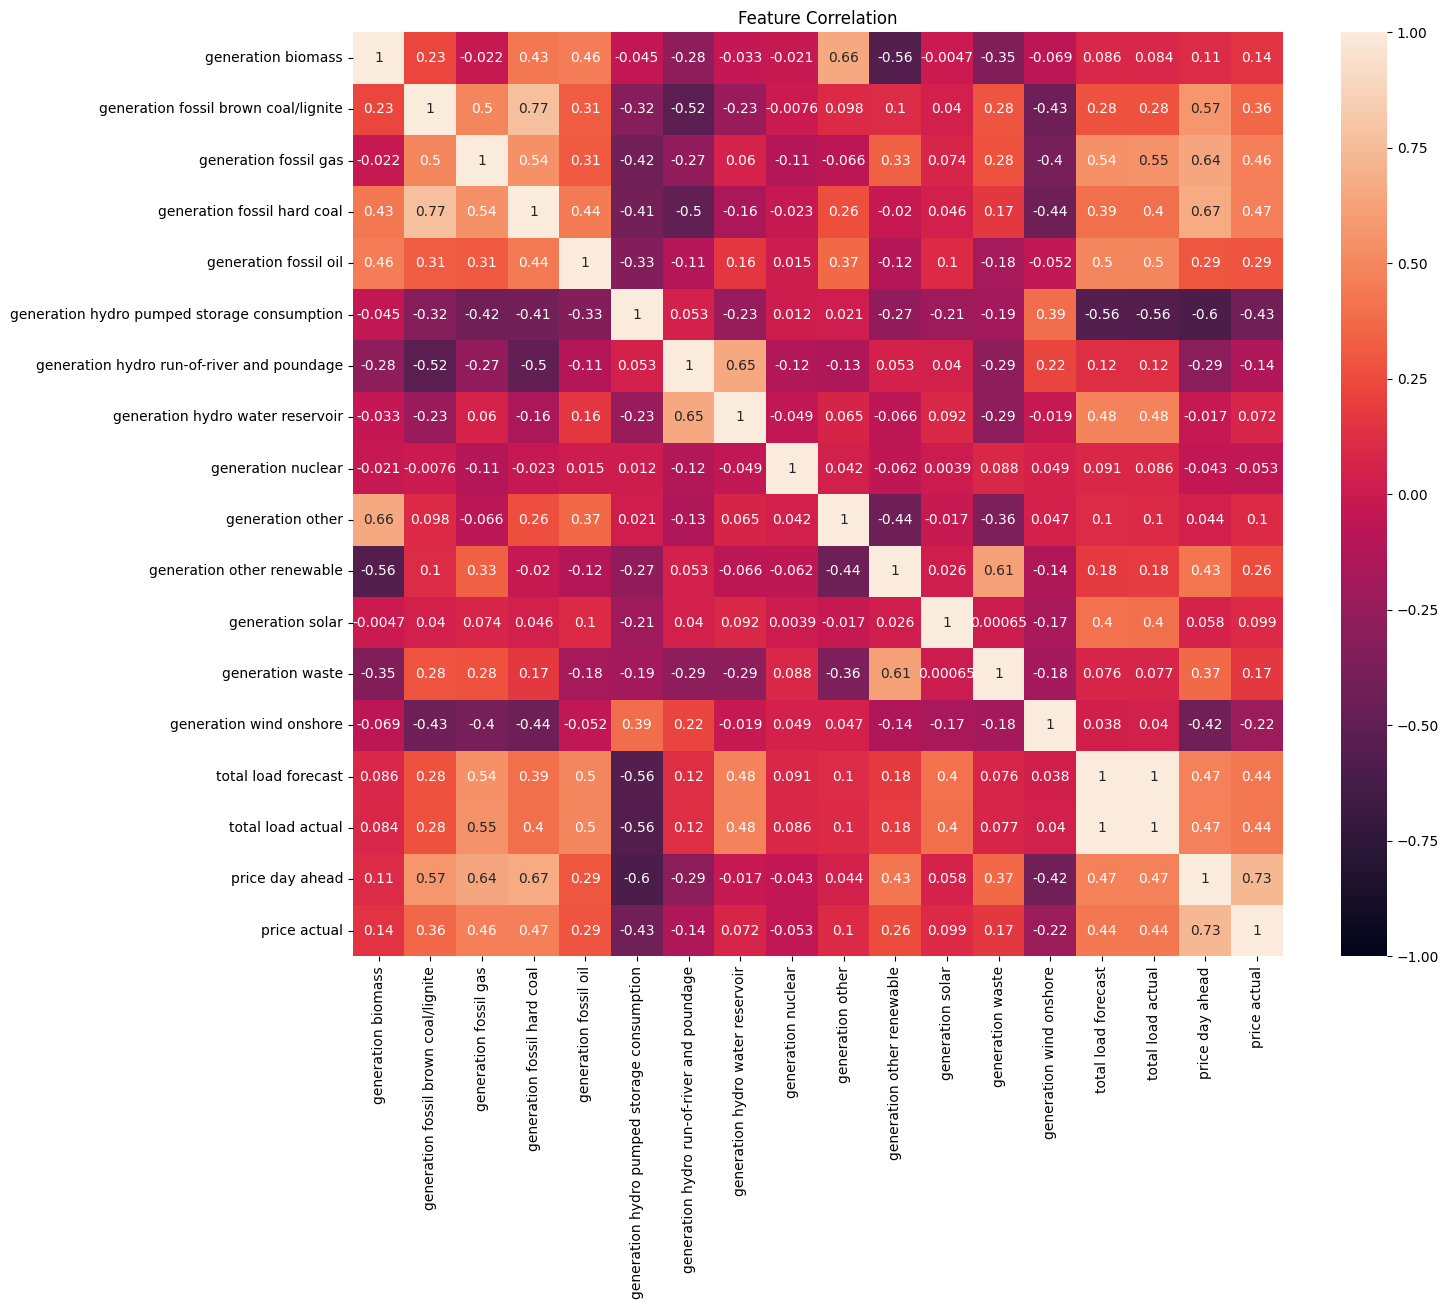

In [ ]:
import matplotlib.pyplot as plt

corr = df_energy.corr()

#plotting heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.title('Feature Correlation')
plt.show()

A couple interesting observations:
- The high correlation between "total load forecast" and "total load actual" would be expected, as forecasts are predictions of the actual load, and the goal is typically to make these predictions as accurate as possible.
- "Price day ahead" and "price actual" have a strong positive correlation, this indicates that the day-ahead pricing predictions are quite accurate in forecasting the actual prices.

### Descriptive Statistics

We now want to get a general idea of each variable in the data.

In [ ]:
df_energy.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35064.000000                          35064.000000   
mean           383.531343                            448.094570   
std             85.346266                            354.618269   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil gas  generation fossil hard coal  \
count           35064.000000                 35064.000000   
mean             5622.700647                  4256.531271   
std              2201.510984                  1961.988937   
min                 0.000000                     0.000000   
25%              4126.000000                  2527.000000   
50%              4969.500000                  4475.000000   
75%              6429.000000                  5839.000000   
max             20034.000000                  8359.000000   

       generation fossil oil  generation hydro pumped storage consumption  \
count           35064.000000                                 35064.000000   
mean              298.342417                                   475.582706   
std                52.519927                                   792.312704   
min                 0.000000                                     0.000000   
25%               263.000000                                     0.000000   
50%               300.000000                                    68.000000   
75%               330.000000                                   616.000000   
max               449.000000                                  4523.000000   

       generation hydro run-of-river and poundage  \
count                                35064.000000   
mean                                   972.201902   
std                                    400.712304   
min                                      0.000000   
25%                                    637.000000   
50%                                    906.000000   
75%                                   1250.000000   
max                                   2000.000000   

       generation hydro water reservoir  generation nuclear  generation other  \
count                      35064.000000        35064.000000      35064.000000   
mean                        2605.534123         6263.483430         60.226030   
std                         1835.175078          840.272333         20.238792   
min                            0.000000            0.000000          0.000000   
25%                         1078.000000         5759.000000         53.000000   
50%                         2165.000000         6564.000000         57.000000   
75%                         3758.000000         7025.000000         80.000000   
max                         9728.000000         7117.000000        106.000000   

       generation other renewable  generation solar  generation waste  \
count                35064.000000      35064.000000      35064.000000   
mean                    85.634326       1432.818546        269.418692   
std                     14.076948       1679.961733         50.218423   
min                      0.000000          0.000000          0.000000   
25%                     73.000000         71.000000        240.000000   
50%                     88.000000        616.000000        279.000000   
75%                     97.000000       2579.000000        310.000000   
max                    119.000000       5792.000000        357.000000   

       generation wind onshore  total load forecast  total load actual  \
count             35064.000000         35064.000000       35064.000000   
mean               5464.980450         28712.129962       28698.281385   
std                3213.586296          4594.100854        4575.828854 

### Distribution of Energy Dataset

We will look at the distribution of each variable in the datasets.

### Removing Outliers in Energy Dataframe

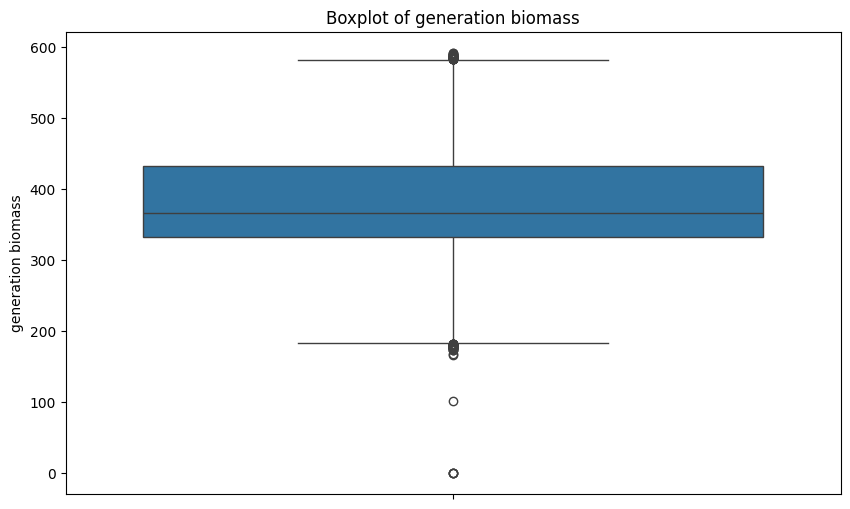

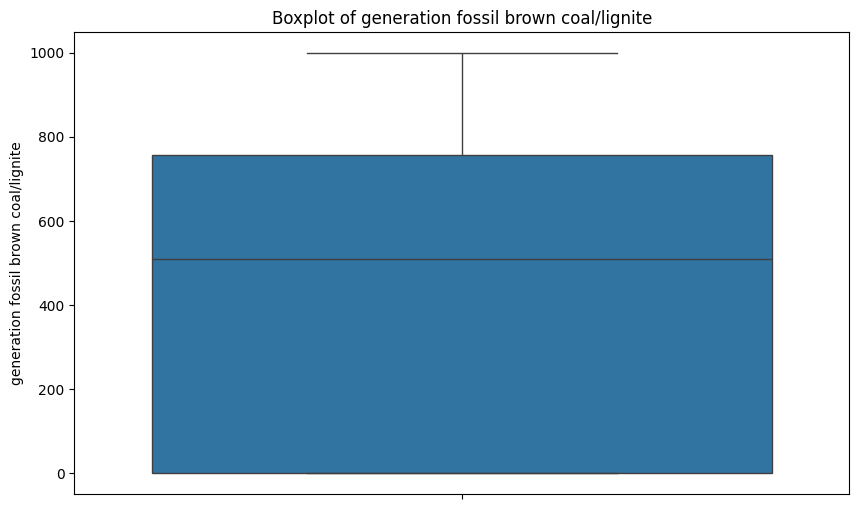

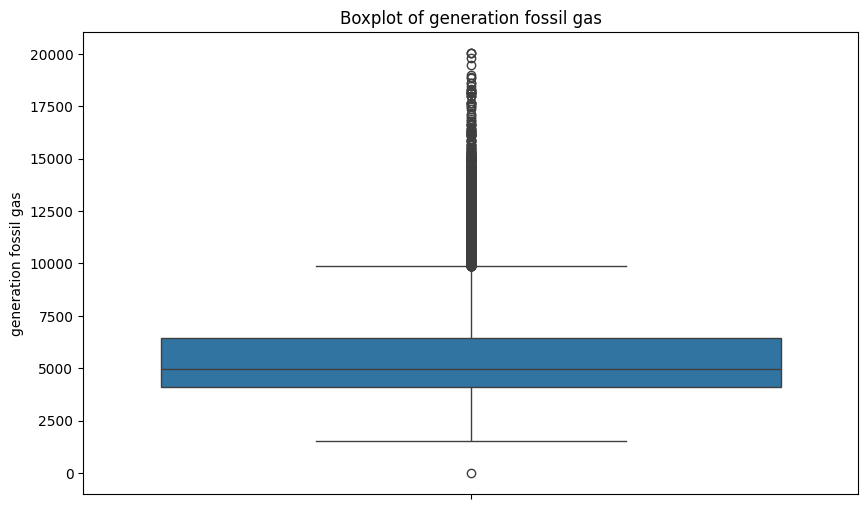

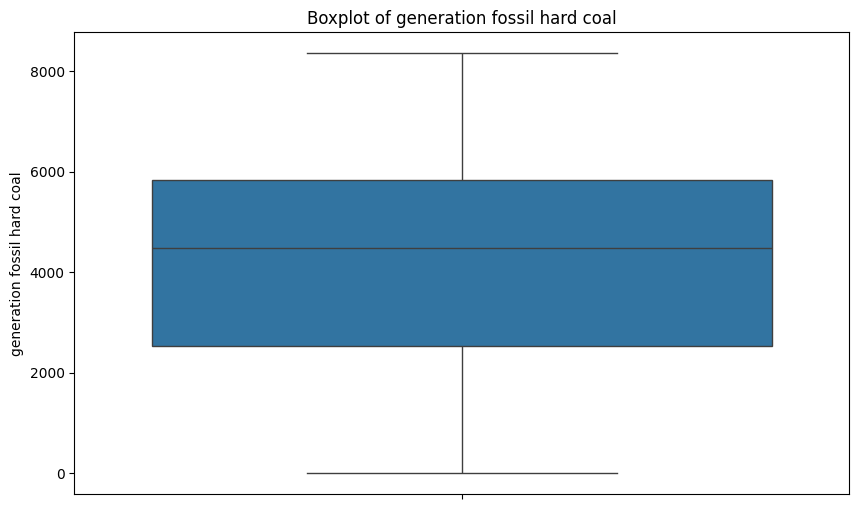

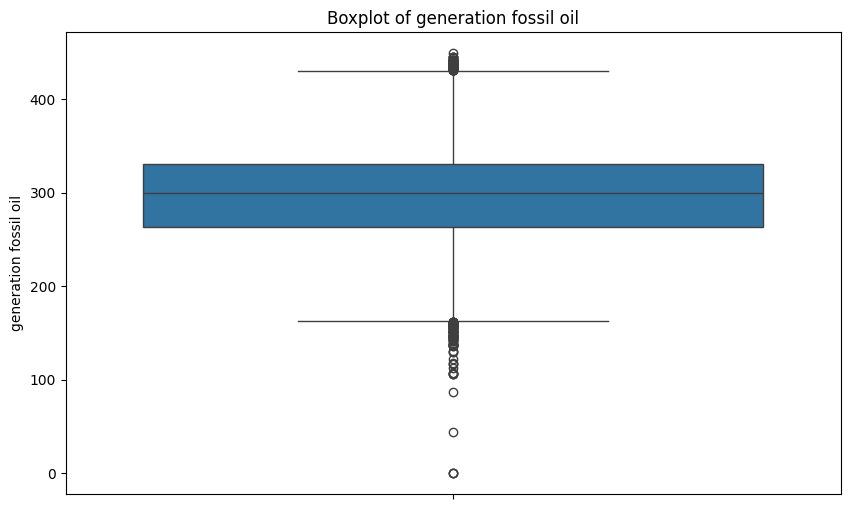

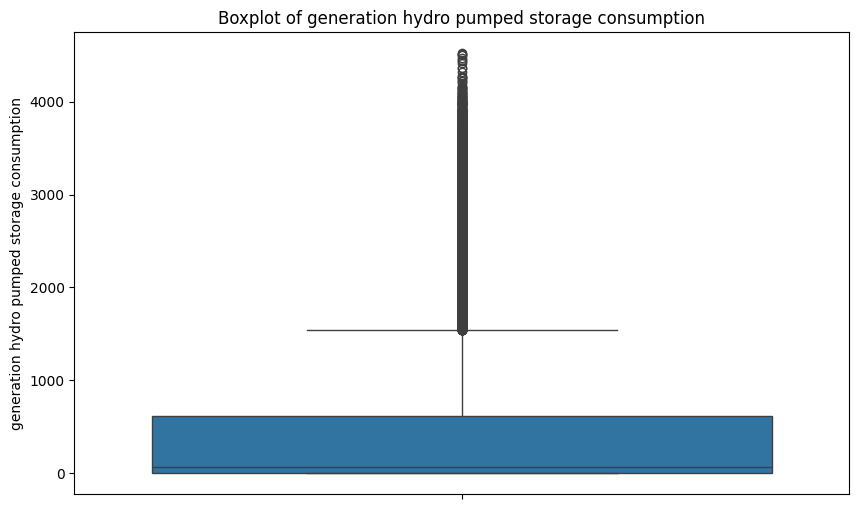

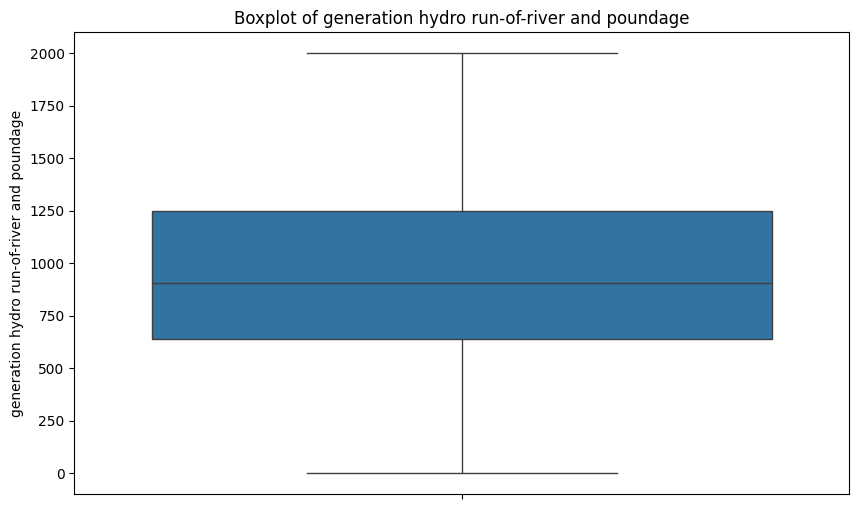

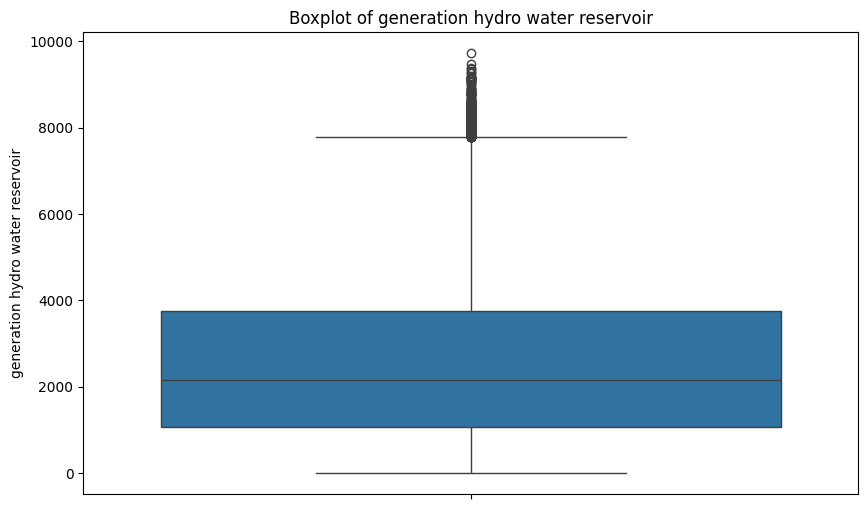

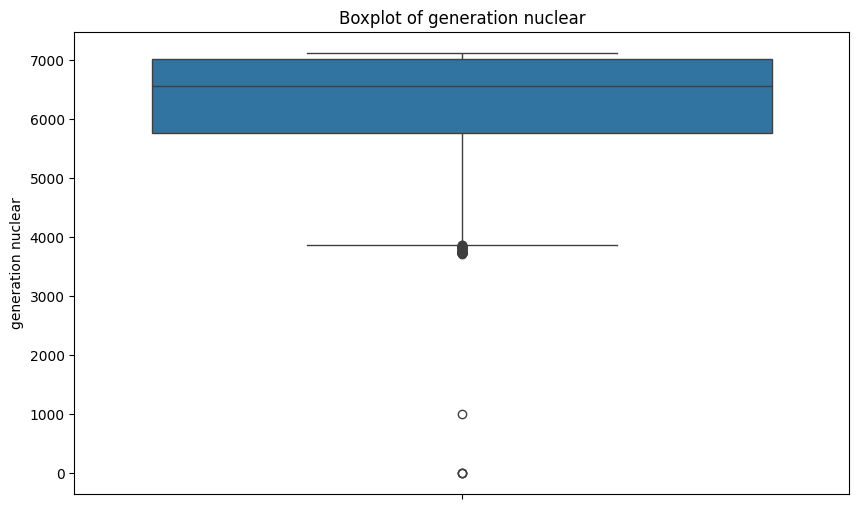

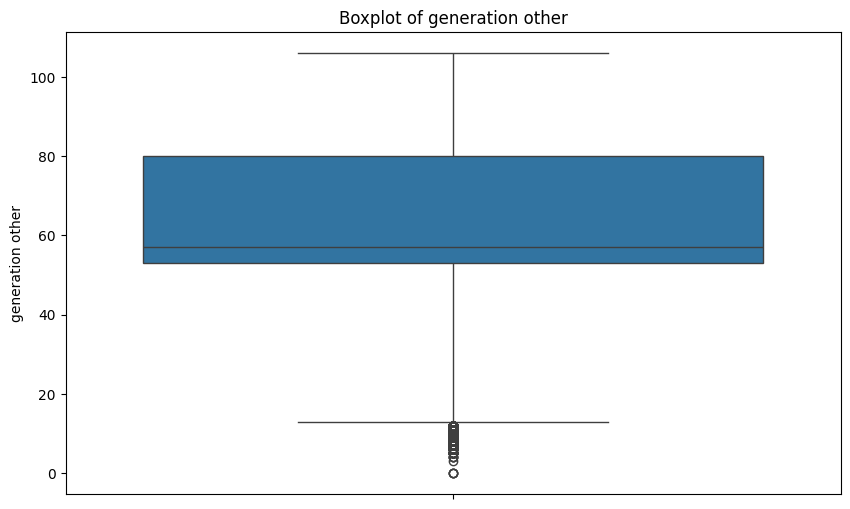

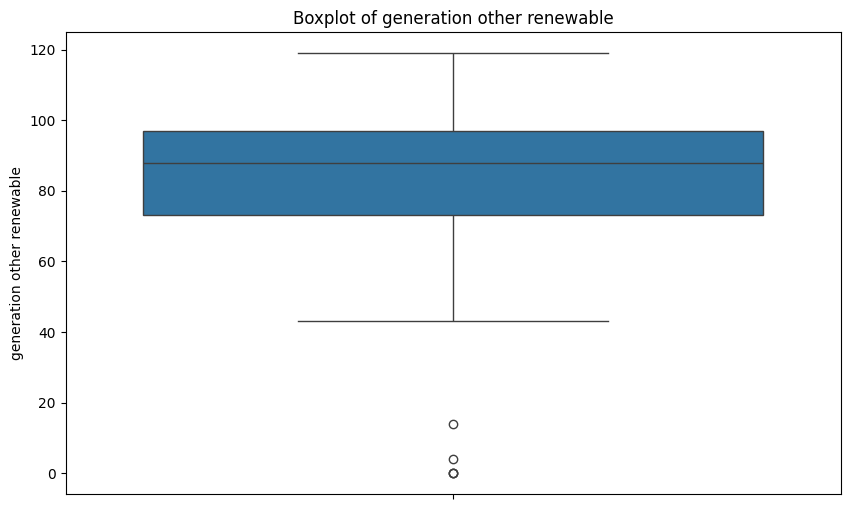

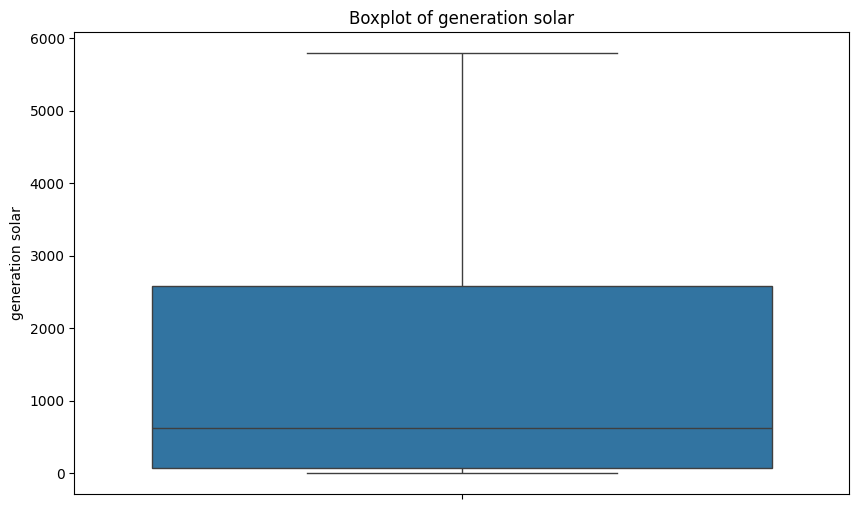

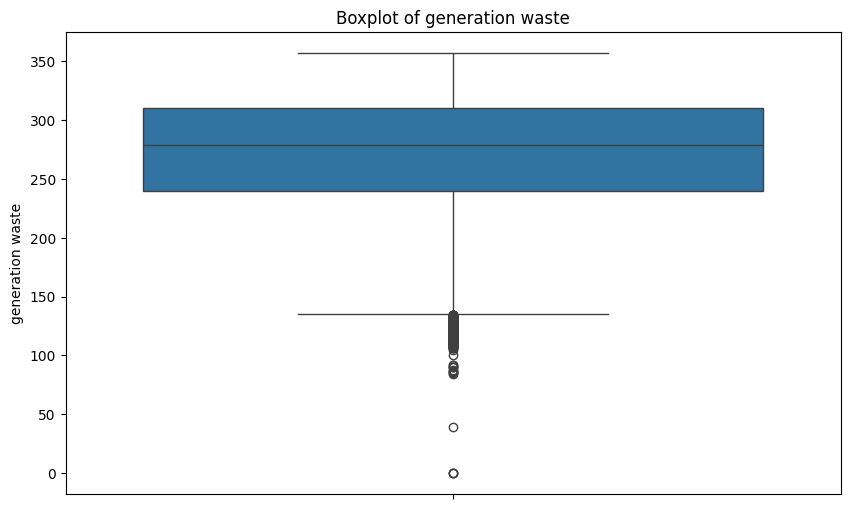

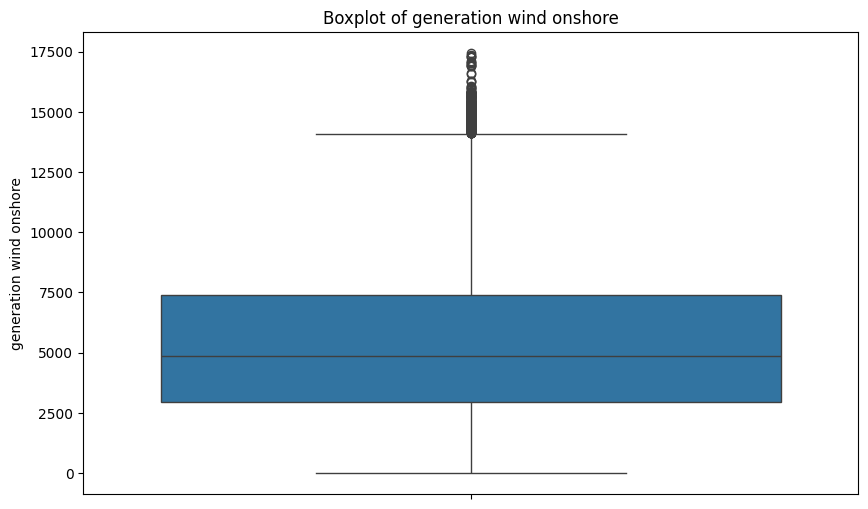

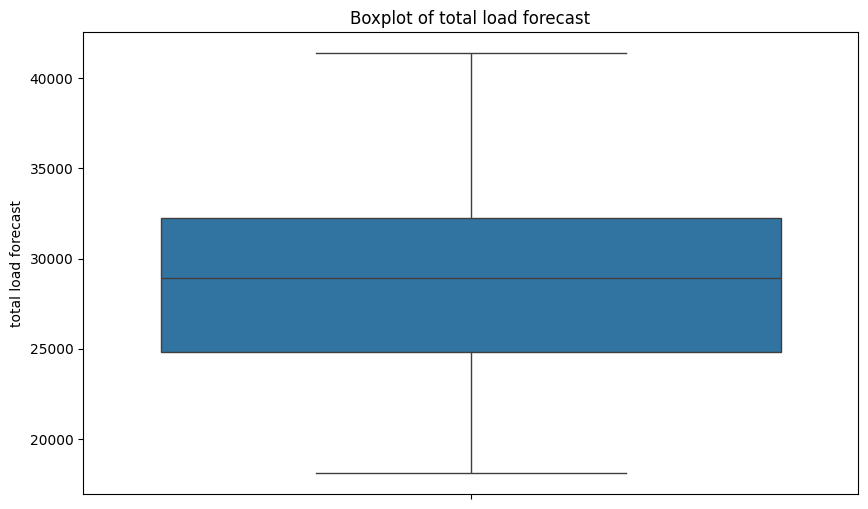

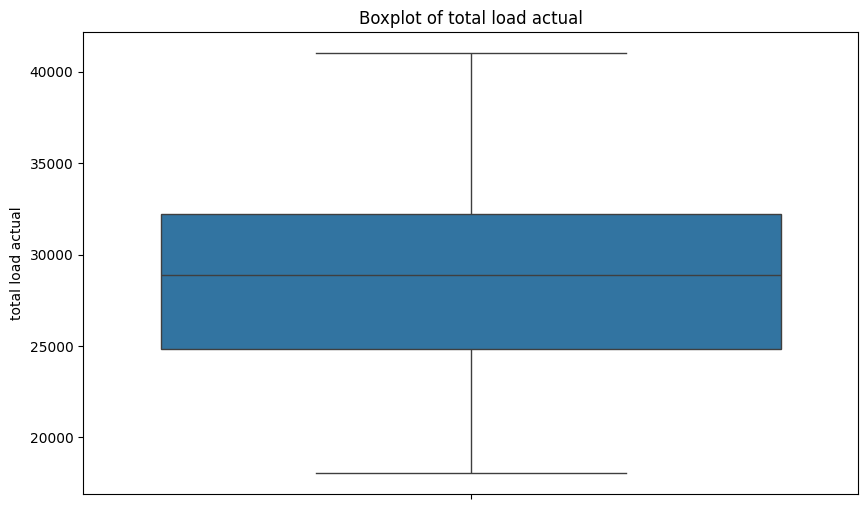

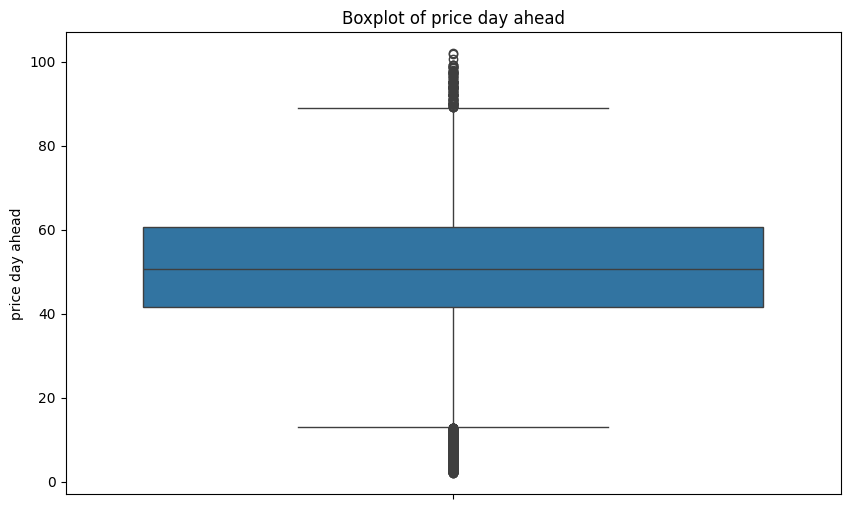

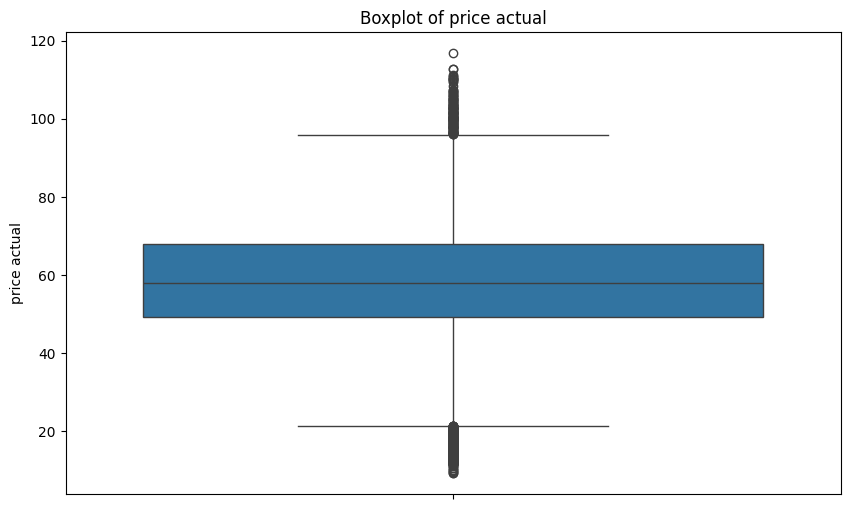

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns
eg_numeric_columns = df_energy.select_dtypes(include=['float64', 'int64']).columns

# Generate a boxplot for each numeric column
for column in eg_numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_energy[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

According to the boxplots populated; generation biomass, generation fossil gas, generation fossil oil, generation hydro pumped storage consumption, generation hydro water reservoir, generation nuclear, generation other, generation other renewable, generation waste, generation wind onshore, price day ahead, and price actual have outliers that will be removed from the code below.

In [ ]:
def remove_outliers(df):
    """
    Remove rows from DataFrame where any column's value is more than 3 standard deviations from the mean.

    Parameters:
    df (pd.DataFrame): The input DataFrame from which to remove outliers.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed.
    """
    df_cleaned = df.copy()  # Make a copy of the DataFrame
    for col in df_cleaned.select_dtypes(include=[np.number]).columns:  # Iterate over numeric columns only
        mean = df_cleaned[col].mean()  # Calculate mean
        std_dev = df_cleaned[col].std()  # Calculate standard deviation

        # Define the upper and lower bounds for outliers
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev

        # Filter the DataFrame
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

df_energy_cleaned = remove_outliers(df_energy)
df_energy_cleaned

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   
...                                       ...   
2018-12-31 19:00:00+01:00               297.0   
2018-12-31 20:00:00+01:00               296.0   
2018-12-31 21:00:00+01:00               292.0   
2018-12-31 22:00:00+01:00               293.0   
2018-12-31 23:00:00+01:00               290.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   
...                                                         ...   
2018-12-31 19:00:00+01:00                                   0.0   
2018-12-31 20:00:00+01:00                                   0.0   
2018-12-31 21:00:00+01:00                                   0.0   
2018-12-31 22:00:00+01:00                                   0.0   
2018-12-31 23:00:00+01:00                                   0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   
...                                          ...                          ...   
2018-12-31 19:00:00+01:00                 7634.0                       2628.0   
2018-12-31 20:00:00+01:00                 7241.0                       2566.0   
2018-12-31 21:00:00+01:00                 7025.0                       2422.0   
2018-12-31 22:00:00+01:00                 6562.0                       2293.0   
2018-12-31 23:00:00+01:00                 6926.0                       2166.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   
...                                          ...   
2018-12-31 19:00:00+01:00                  178.0   
2018-12-31 20:00:00+01:00                  174.0   
2018-12-31 21:00:00+01:00                  168.0   
2018-12-31 22:00:00+01:00                  163.0   
2018-12-31 23:00:00+01:00                  163.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   
...                                                                ...   
2018-12-31 19:00:00+01:00                                          1.0   
2018-12-31 20:00:00+01:00                                          1.0   
2018-12-31 21:00:00+01:00                     

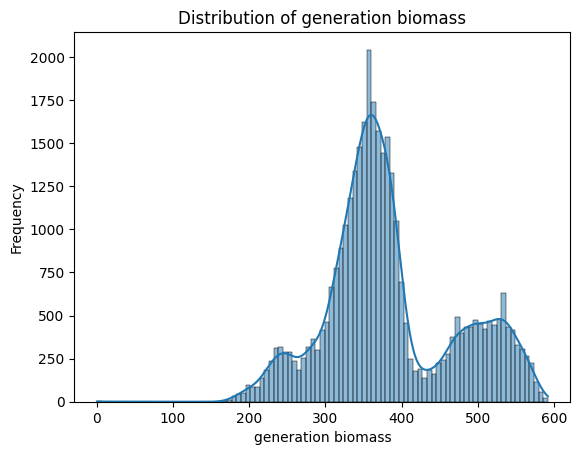

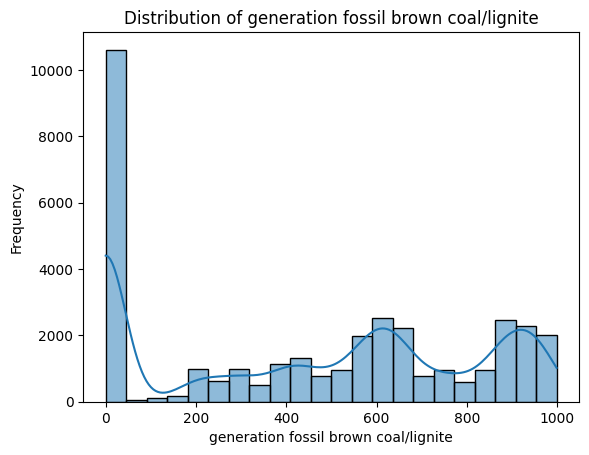

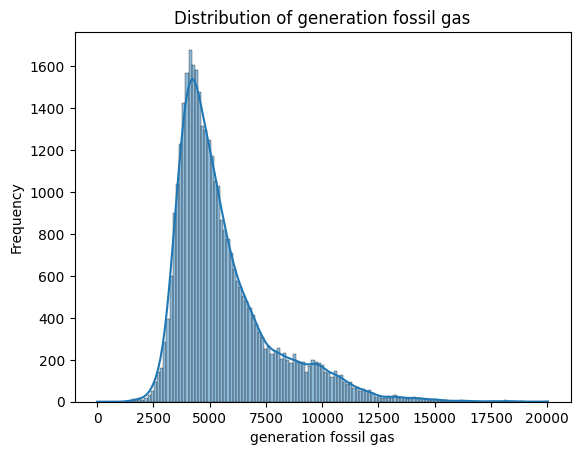

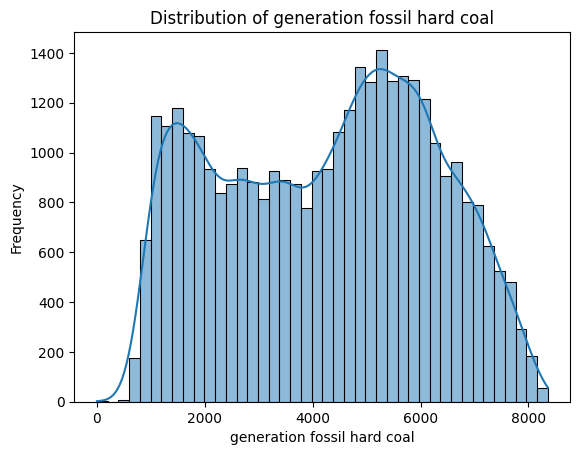

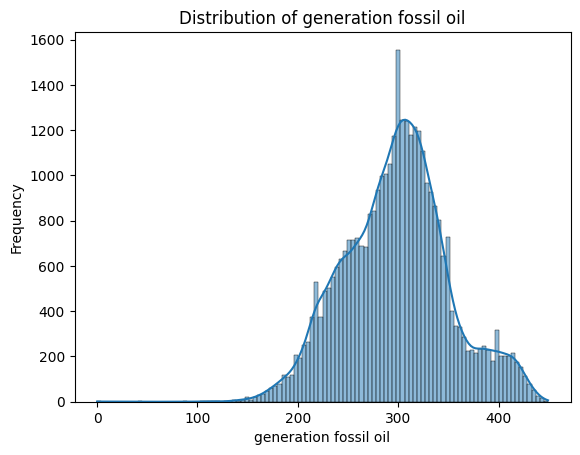

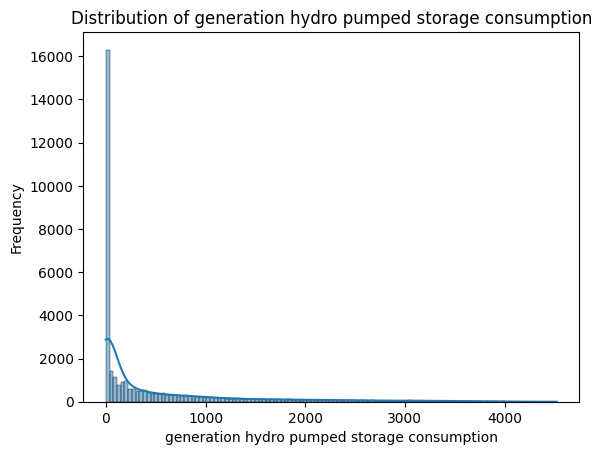

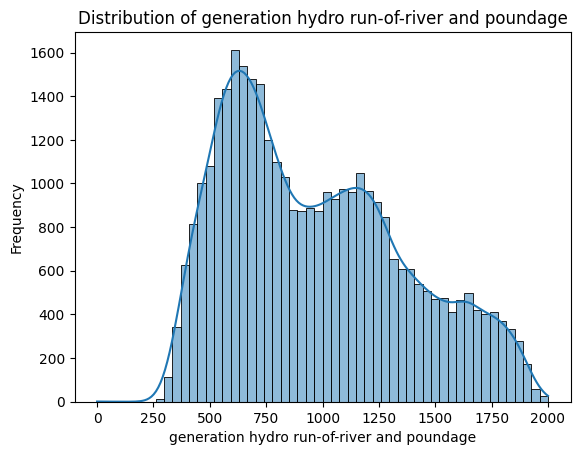

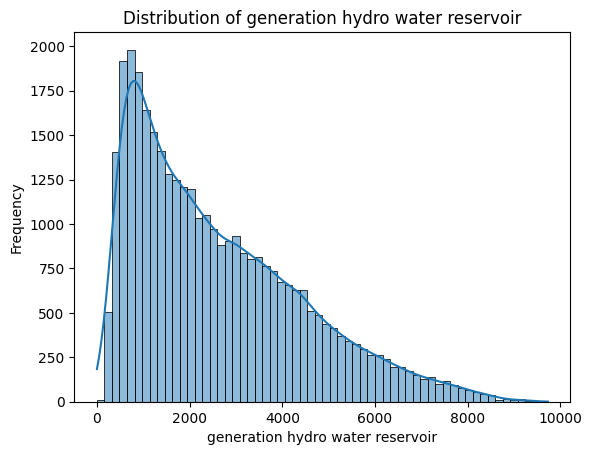

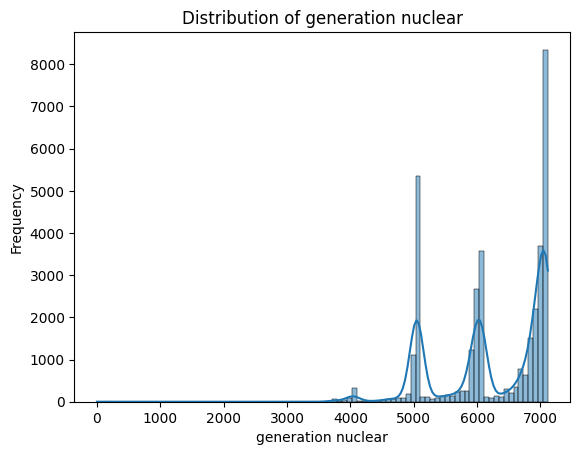

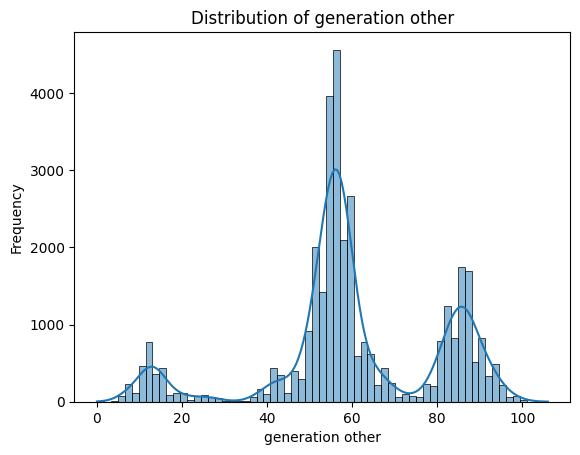

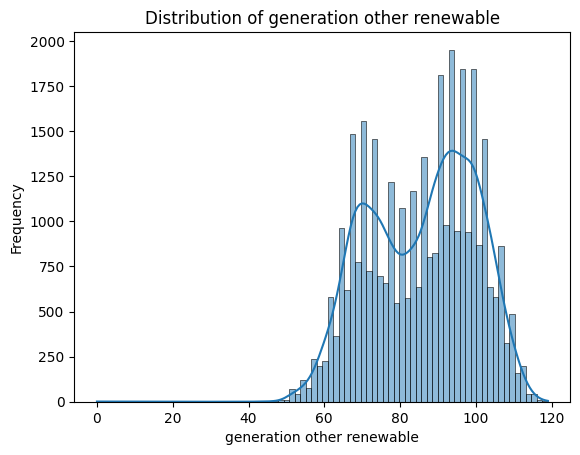

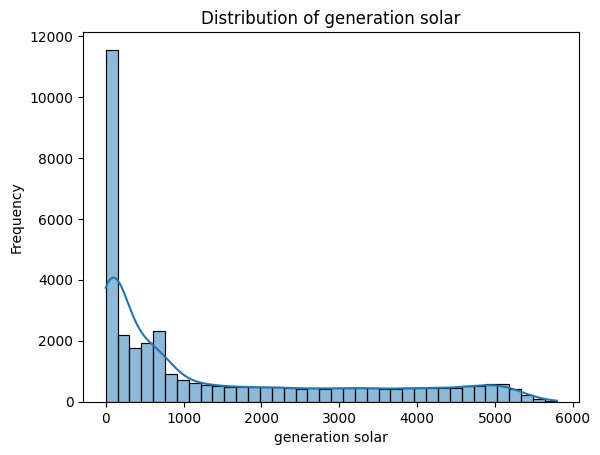

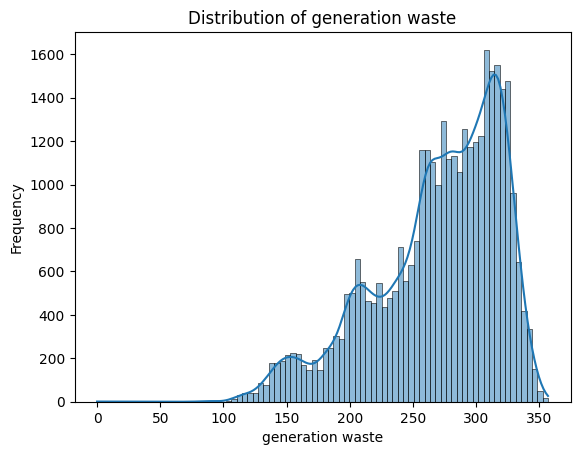

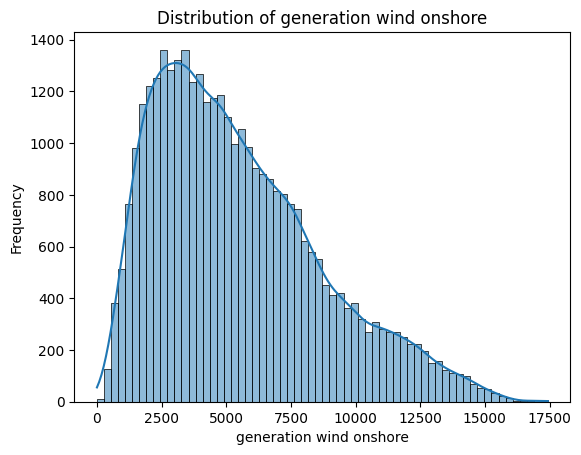

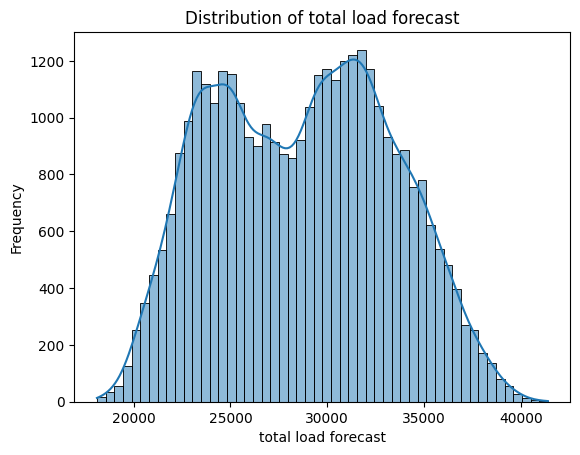

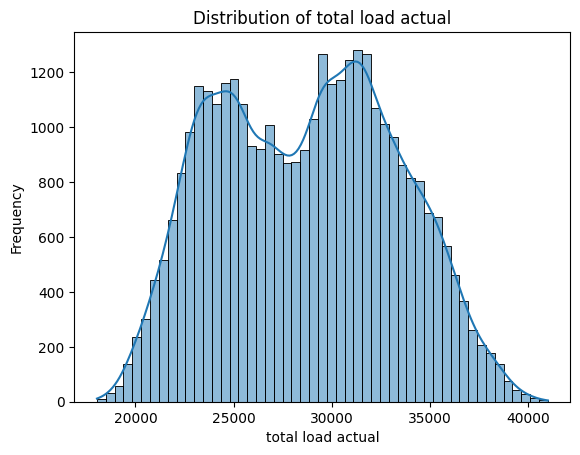

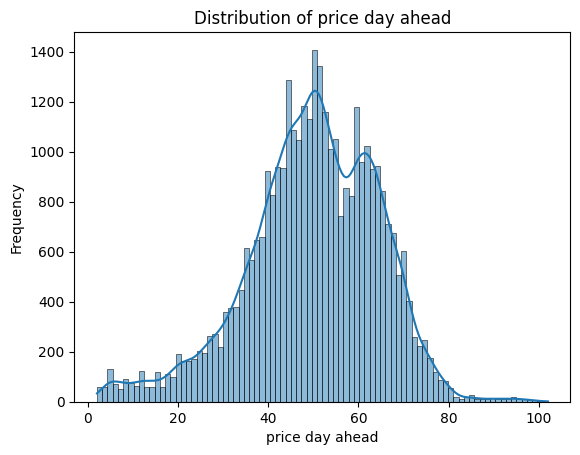

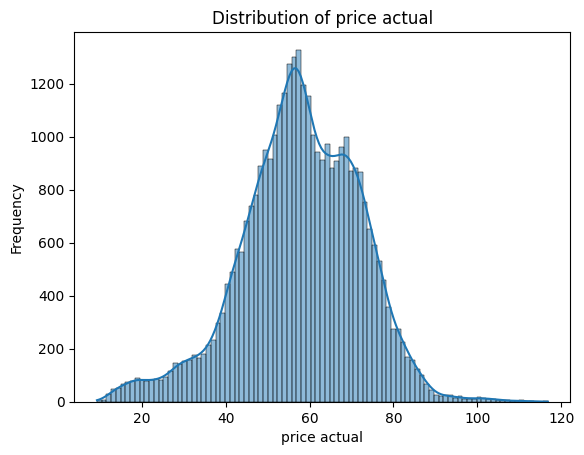

In [ ]:
import seaborn as sns

# Check the distribution of each feature
for column in df_energy:
    plt.figure()
    sns.histplot(df_energy[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.show()

From the computed distribution of the data for all variables, the data is skewed. Therefore, we will scale and transform the data.


### Scale and Transform Energy Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, yeojohnson

df_energy = df_energy_cleaned.copy()
scaler = MinMaxScaler()

# Selecting numerical columns, excluding 'time'
numerical_columns = df_energy.select_dtypes(include=['float64', 'int64']).columns

# Applying MinMaxScaler to the numerical columns
energy_data_normalized = df_energy.copy()
energy_data_normalized[numerical_columns] = scaler.fit_transform(df_energy[numerical_columns])

# Calculating and filtering skewness of the numerical columns to identify the columns that are highly skewed
skewness = energy_data_normalized[numerical_columns].apply(lambda x: skew(x.dropna()))
skewness = skewness.sort_values(ascending=False)
highly_skewed = skewness[abs(skewness) > 1]

# Applying Yeo-Johnson Transformation to the highly skewed columns
for col in highly_skewed.index:
    energy_data_normalized[col], _ = yeojohnson(energy_data_normalized[col].fillna(energy_data_normalized[col].mean()))

# Recalculating skewness after transformation to check improvement
new_skewness = energy_data_normalized[highly_skewed.index].apply(lambda x: skew(x))
new_skewness = new_skewness.sort_values(ascending=False)
energy_data_normalized.head()


generation biomass  \
time                                            
2015-01-01 00:00:00+01:00            0.658019   
2015-01-01 01:00:00+01:00            0.662736   
2015-01-01 02:00:00+01:00            0.660377   
2015-01-01 03:00:00+01:00            0.636792   
2015-01-01 04:00:00+01:00            0.613208   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                              0.329329   
2015-01-01 01:00:00+01:00                              0.328328   
2015-01-01 02:00:00+01:00                              0.323323   
2015-01-01 03:00:00+01:00                              0.254254   
2015-01-01 04:00:00+01:00                              0.187187   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00               0.176731                     0.545420   
2015-01-01 01:00:00+01:00               0.181351                     0.536939   
2015-01-01 02:00:00+01:00               0.176911                     0.514583   
2015-01-01 03:00:00+01:00               0.168742                     0.456765   
2015-01-01 04:00:00+01:00               0.165636                     0.419376   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00               0.065147   
2015-01-01 01:00:00+01:00               0.052117   
2015-01-01 02:00:00+01:00               0.048860   
2015-01-01 03:00:00+01:00               0.058632   
2015-01-01 04:00:00+01:00               0.045603   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                     0.125515   
2015-01-01 01:00:00+01:00                                     0.128088   
2015-01-01 02:00:00+01:00                                     0.136356   
2015-01-01 03:00:00+01:00                                     0.143072   
2015-01-01 04:00:00+01:00                                     0.146666   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                    0.446647   
2015-01-01 01:00:00+01:00                                    0.422157   
2015-01-01 02:00:00+01:00                                    0.401166   
2015-01-01 03:00:00+01:00                                    0.387172   
2015-01-01 04:00:00+01:00                                    0.389504   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                          0.218364   
2015-01-01 01:00:00+01:00                          0.188257   
2015-01-01 02:00:00+01:00                          0.152405   
2015-01-01 03:00:00+01:00                          0.078451   
2015-01-01 04:00:00+01:00                          0.071081   

                           generation nuclear  generation other  \
time                                                              
2015-01-01 00:00:00+01:00            0.993677           0.38835   
2015-01-01 01:00:00+01:00            0.993677           0.38835   
2015-01-01 02:00:00+01:00            0.994581           0.38835   
2015-01-01 03:00:00+01:00            0.994280           0.38835   
2015-01-01 04:00:00+01:00            0.993978           0.38835   

                           generation other renewable  generation solar  \
time                                                                      
2015-01-01 00:00:00+01:00                    0.378378          0.008117   
2015-01-01 01:00:00+01:00                    0.351351          0.008290   
2015-01-01 02:00:00+01:00            

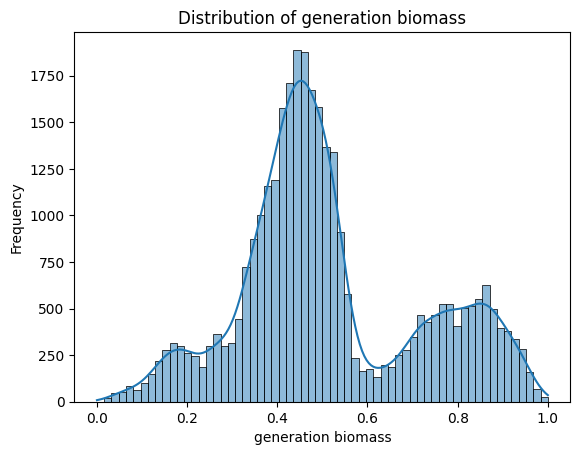

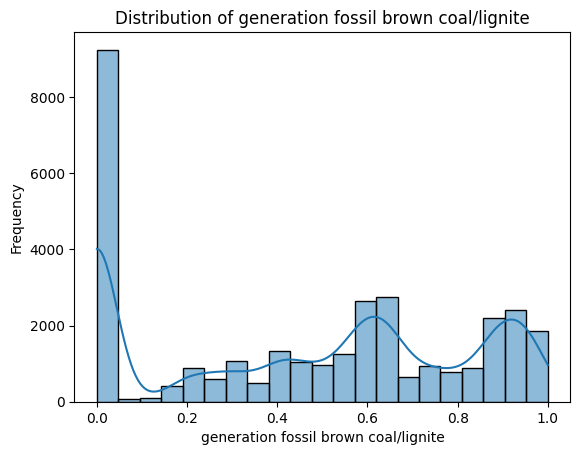

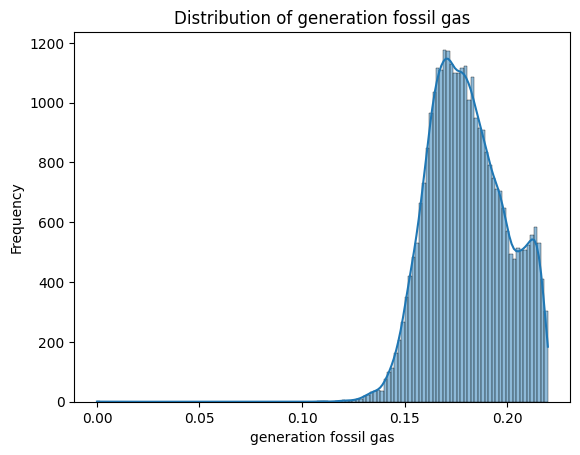

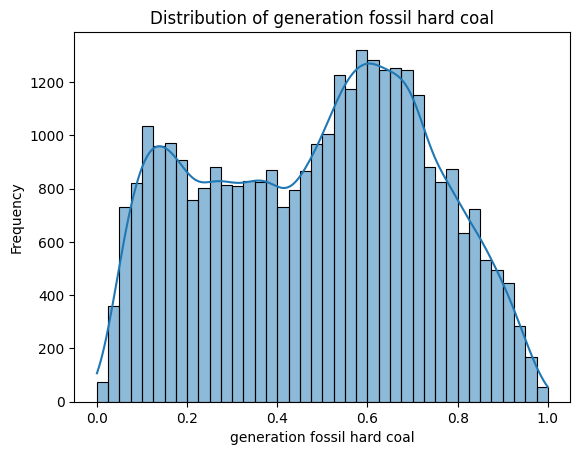

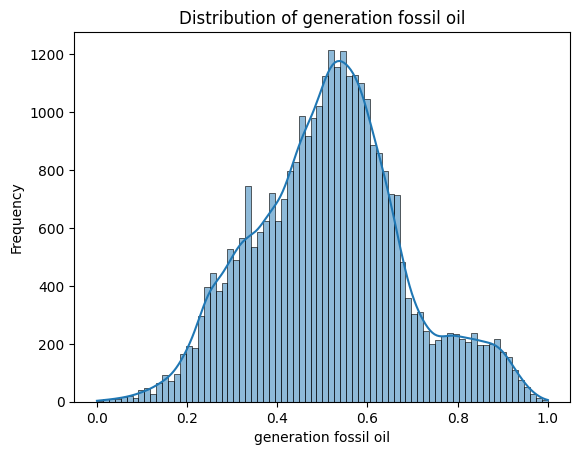

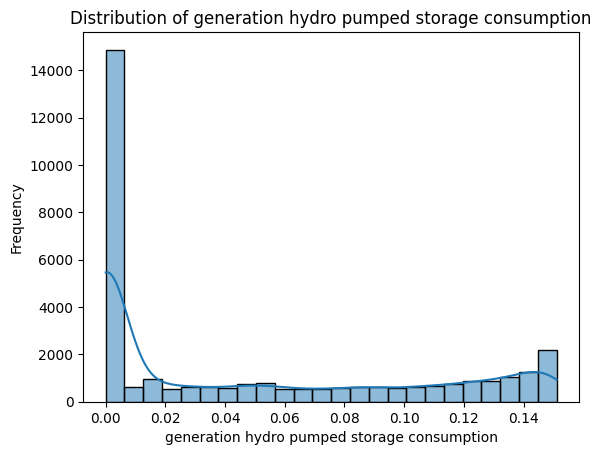

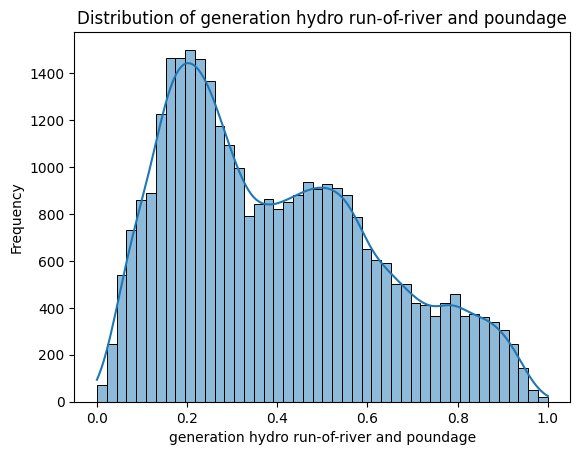

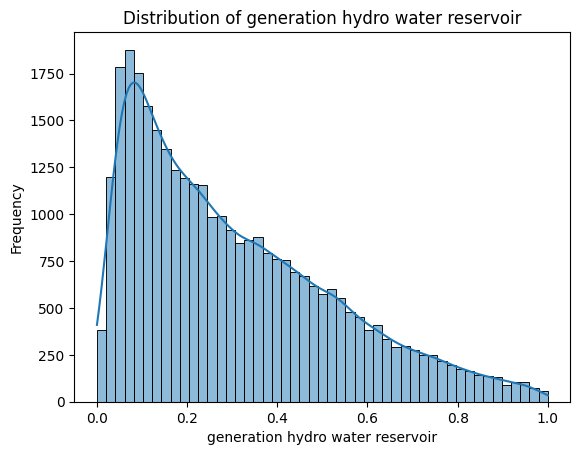

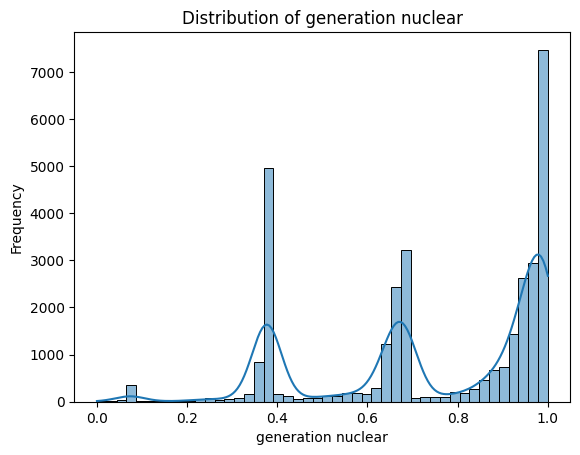

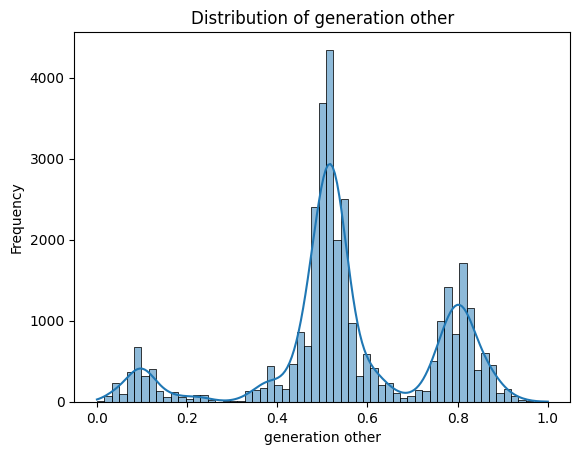

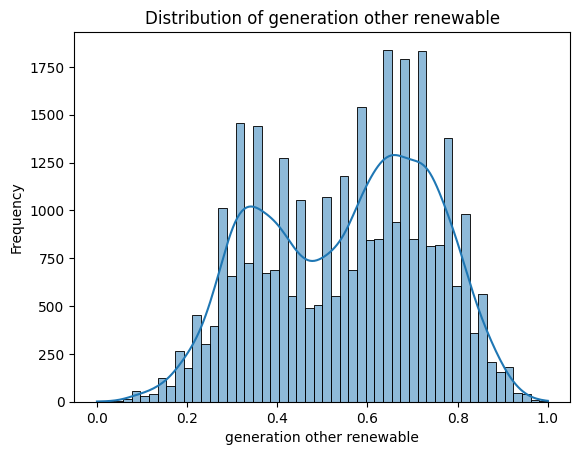

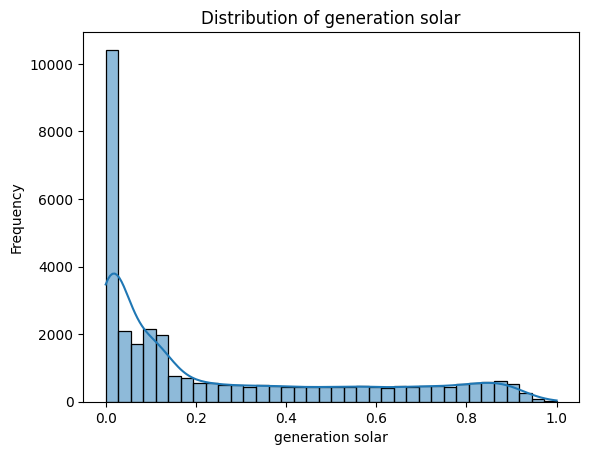

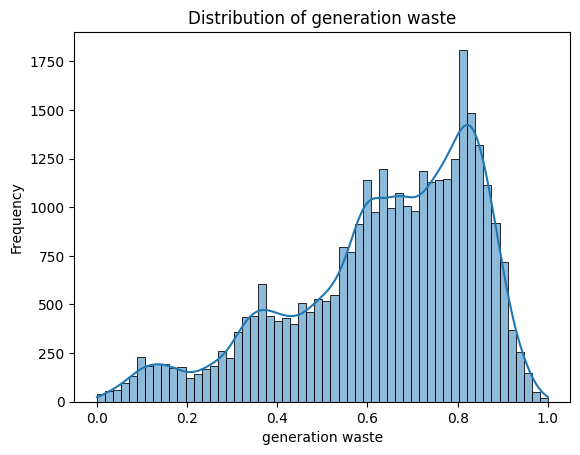

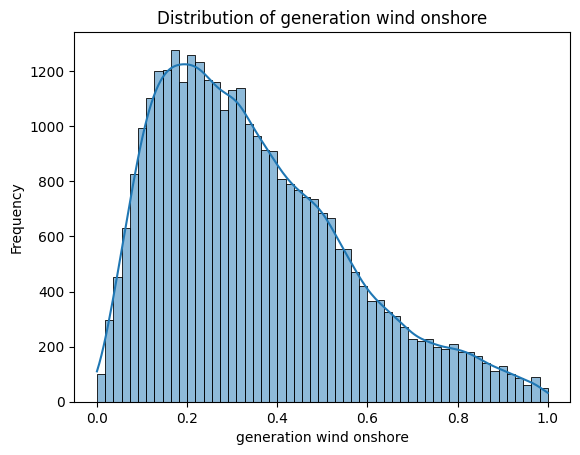

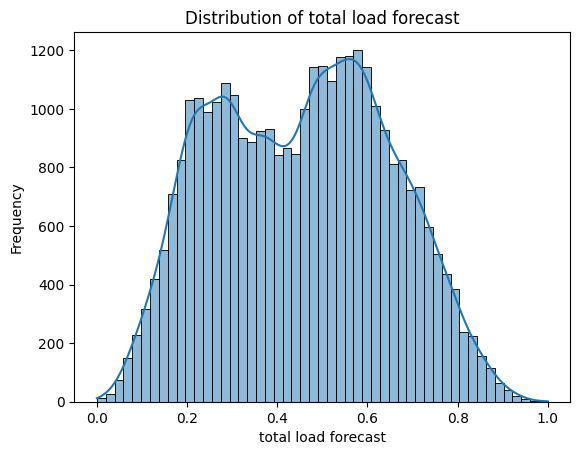

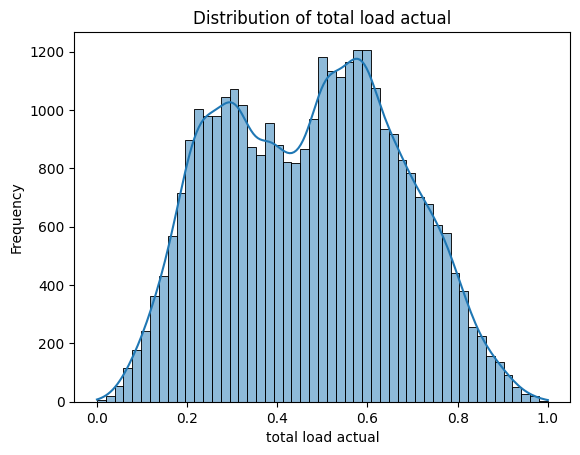

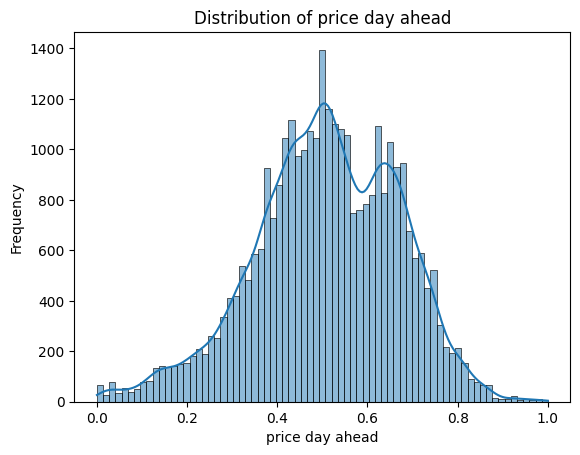

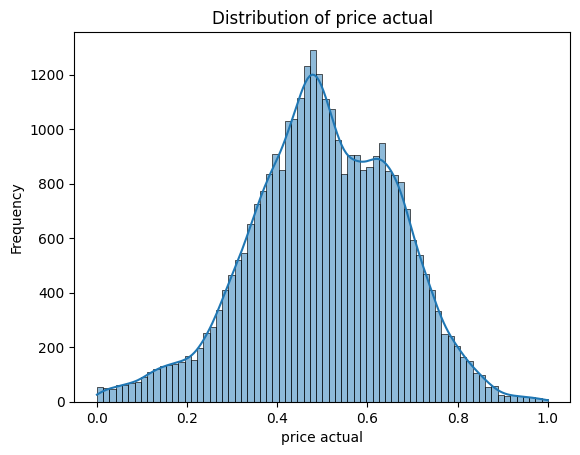

In [ ]:
import seaborn as sns

# Check the distribution of each feature
for column in energy_data_normalized:
    plt.figure()
    sns.histplot(energy_data_normalized[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.show()

## Weather Dataset Cleaning

In [ ]:
df_weather = pd.read_csv('/content/weather_features.csv')

df_weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

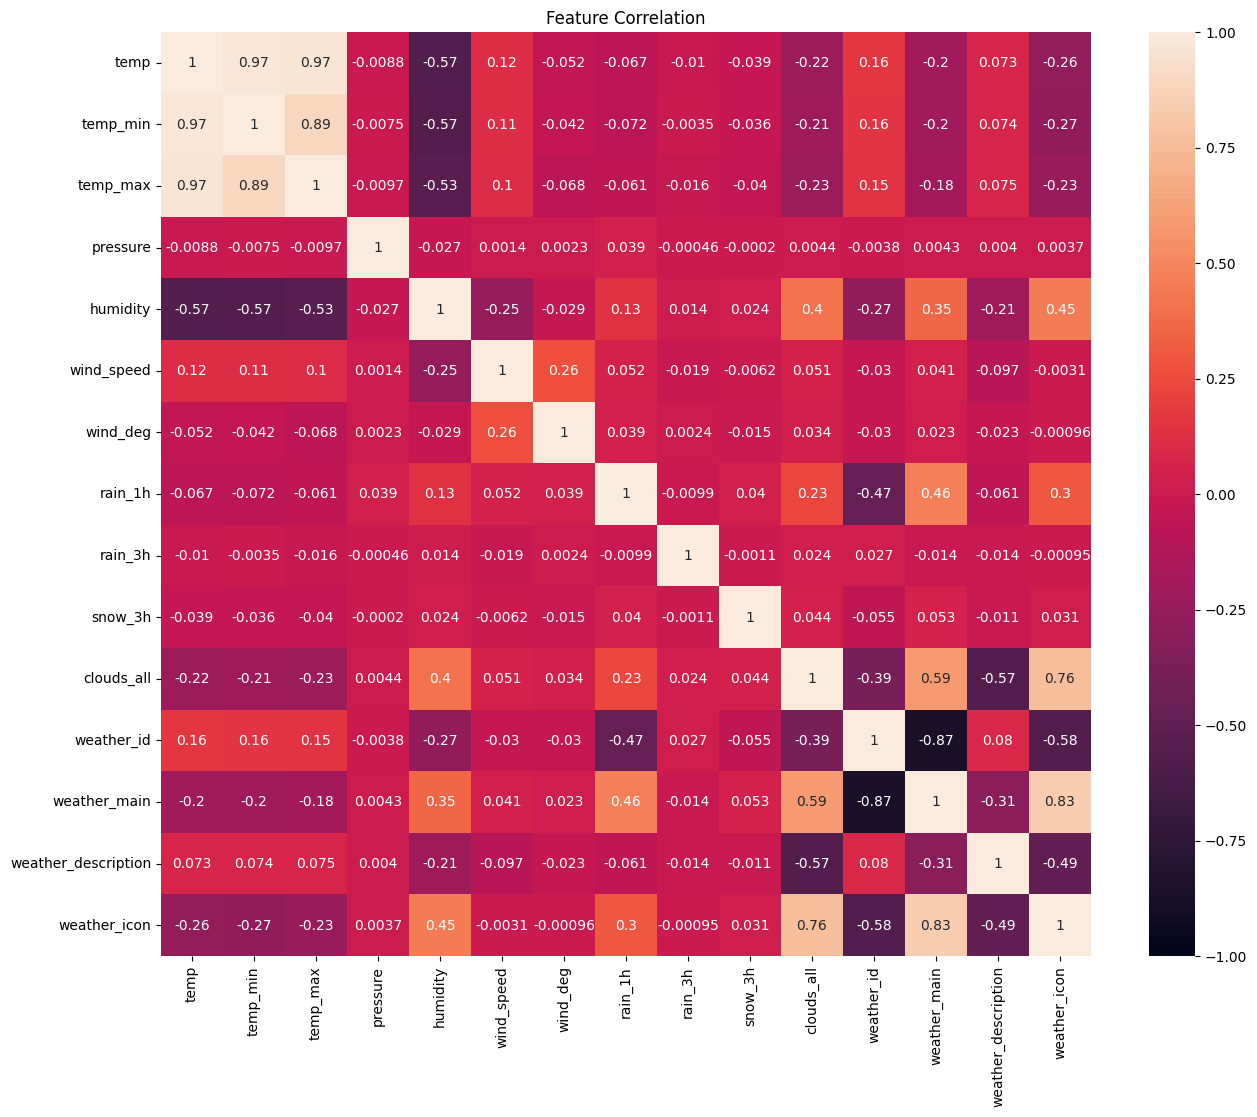

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_temp = df_weather.copy(deep=True)
labels = ['weather_id', 'weather_main', 'weather_description', 'weather_icon']

for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])

df_temp_numeric = df_temp.select_dtypes(include=[np.number])
corr = df_temp_numeric.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.title('Feature Correlation')
plt.show()


Upon examining the dataframe, it's evident that the 'weather_icon' column appears to be extraneous. Furthermore, the cloud coverage, as represented in the 'weather_main' and 'weather_description' columns, could potentially influence predictions. However, considering this dataset is based on hourly data and the impact of cloud coverage is likely manifested in the recorded temperature, we could omit 'weather_main' and 'weather_description' in favour of 'clouds_all'. With the correlation matrix, it becomes clear that there is a substantial correlation among the aforementioned features. Such strong correlations could lead to multicollinearity issues. Consequently, we can remove 'weather_icon', 'weather_main', 'weather_description', and 'weather_id', retaining only 'clouds_all'. Additionally, there exists a pronounced correlation between 'temp', 'temp_min', and 'temp_max'. Therefore, we should eliminate 'temp_max' and 'temp_min', retaining only the 'temp' column for simplicity and to avoid redundancy.

In [ ]:
col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']
df_weather.drop(col_drop_name, axis = 1 , inplace = True)
df_weather = df_weather.reset_index().drop_duplicates()

check_Nans(df_weather)

Number of Nans in each column :
index         0
dt_iso        0
city_name     0
temp          0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
dtype: int64



In [ ]:
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])
df_weather.drop(["dt_iso"] , axis = 1, inplace = True)
df_weather = df_weather.set_index('time')
df_weather.drop(["index"] , axis = 1, inplace = True)

df_weather

city_name     temp  pressure  humidity  wind_speed  \
time                                                                           
2015-01-01 00:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 01:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 02:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 03:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 04:00:00+01:00  Valencia  269.686      1002        78           0   
...                             ...      ...       ...       ...         ...   
2018-12-31 19:00:00+01:00   Seville  287.760      1028        54           3   
2018-12-31 20:00:00+01:00   Seville  285.760      1029        62           3   
2018-12-31 21:00:00+01:00   Seville  285.150      1028        58           4   
2018-12-31 22:00:00+01:00   Seville  284.150      1029        57           4   
2018-12-31 23:00:00+01:00   Seville  283.970      1029        70           3   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
time                                                                        
2015-01-01 00:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        23      0.0      0.0      0.0           0  
...                             ...      ...      ...      ...         ...  
2018-12-31 19:00:00+01:00        30      0.0      0.0      0.0           0  
2018-12-31 20:00:00+01:00        30      0.0      0.0      0.0           0  
2018-12-31 21:00:00+01:00        50      0.0      0.0      0.0           0  
2018-12-31 22:00:00+01:00        60      0.0      0.0      0.0           0  
2018-12-31 23:00:00+01:00        50      0.0      0.0      0.0           0  

[178396 rows x 10 columns]

### Distribution of Weather Dataset

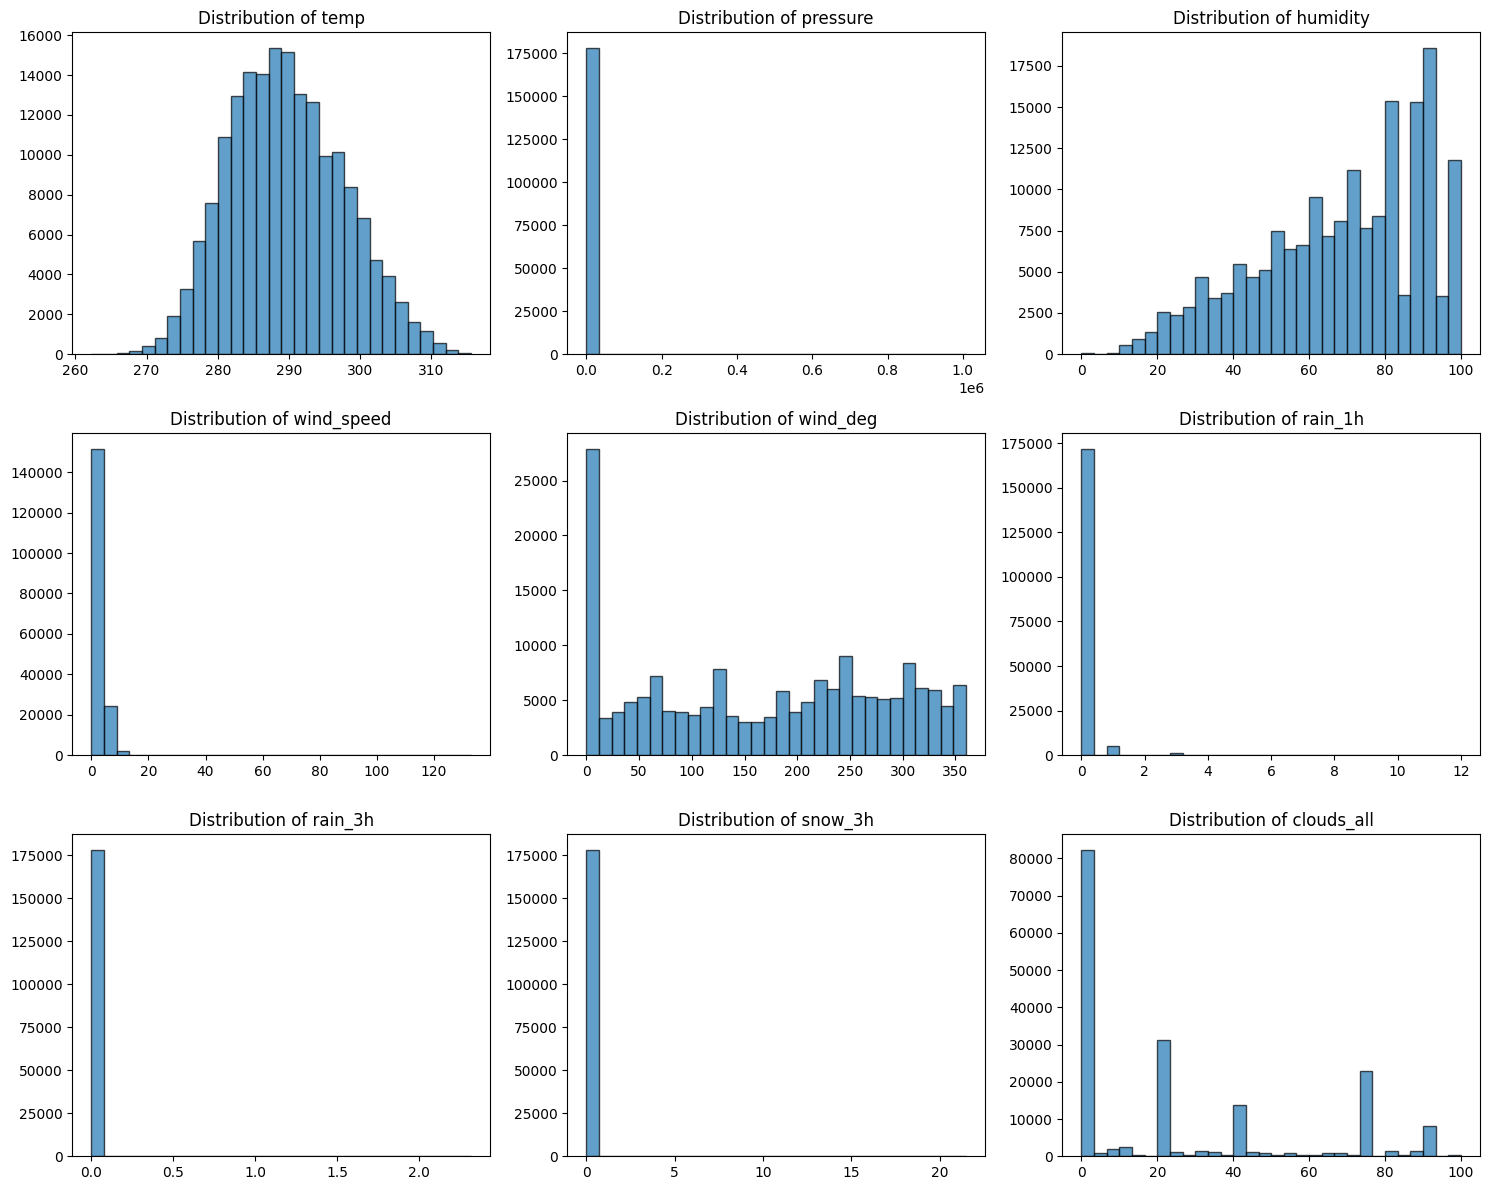

In [ ]:
# Select numerical columns
numerical_columns = df_weather.select_dtypes(include=['float64', 'int64']).columns

# Setting up the figure size and grid for multiple subplots
num_plots = len(numerical_columns)
num_cols = 3  # Number of columns in the grid
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

plt.figure(figsize=(15, num_rows * 4))

# Plotting each numerical feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(df_weather[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

From the computed distribution of the data for all variables, the data is skewed. Therefore, we will scale and transform the data.


### Removing Outliers in Weather Dataframe

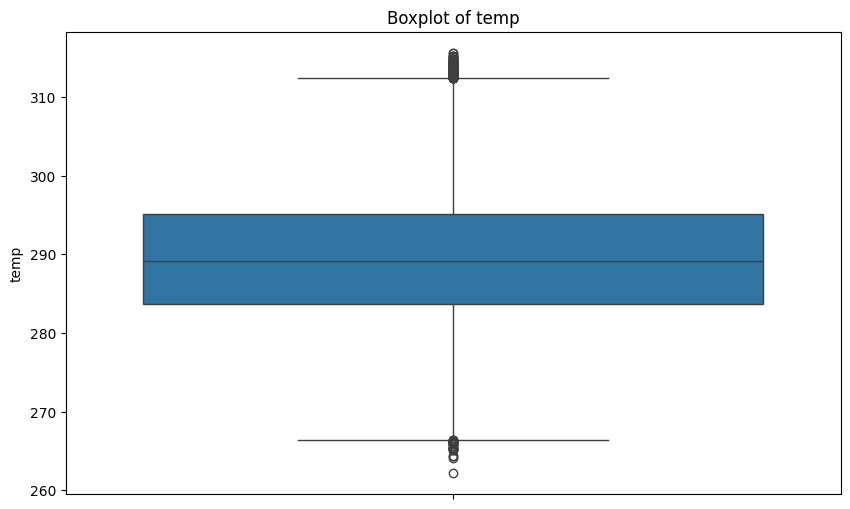

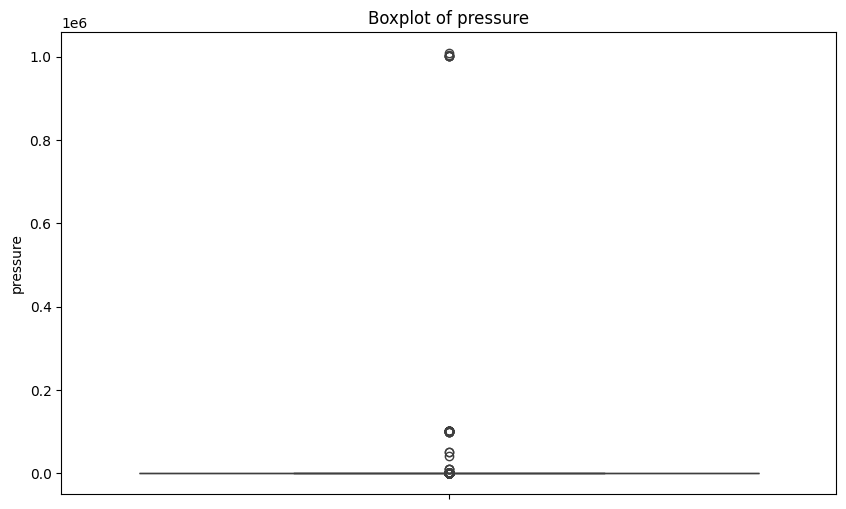

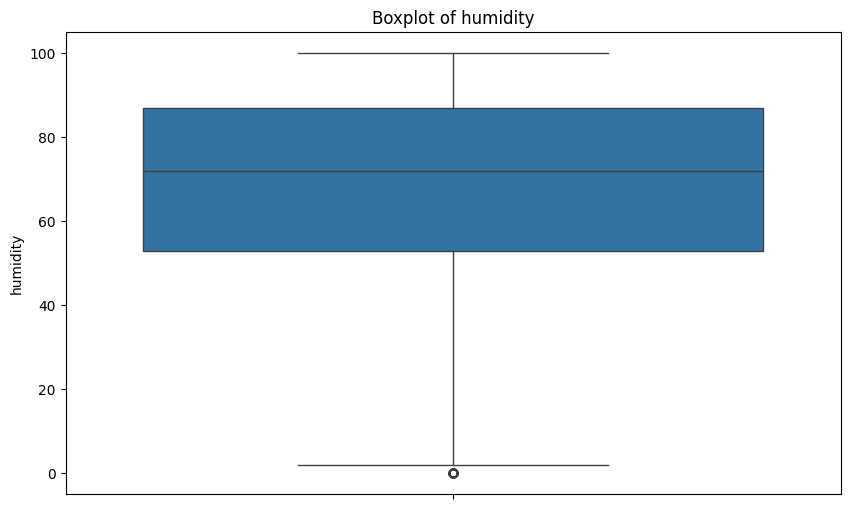

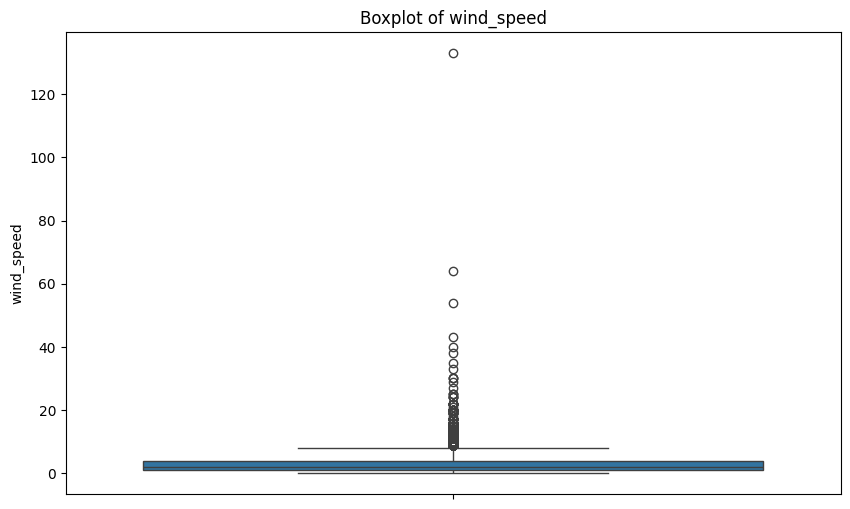

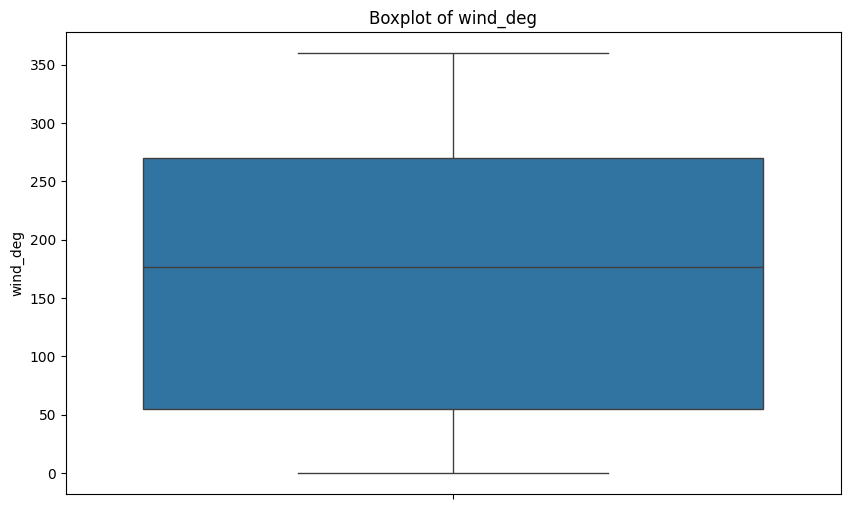

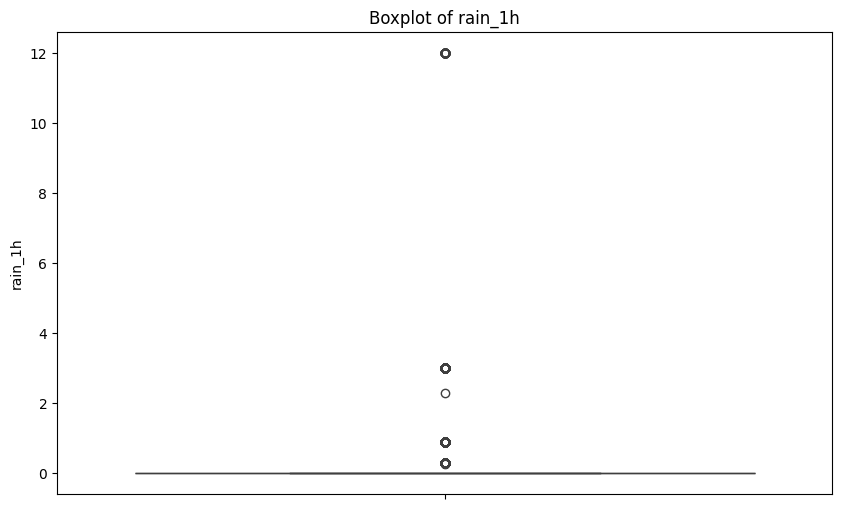

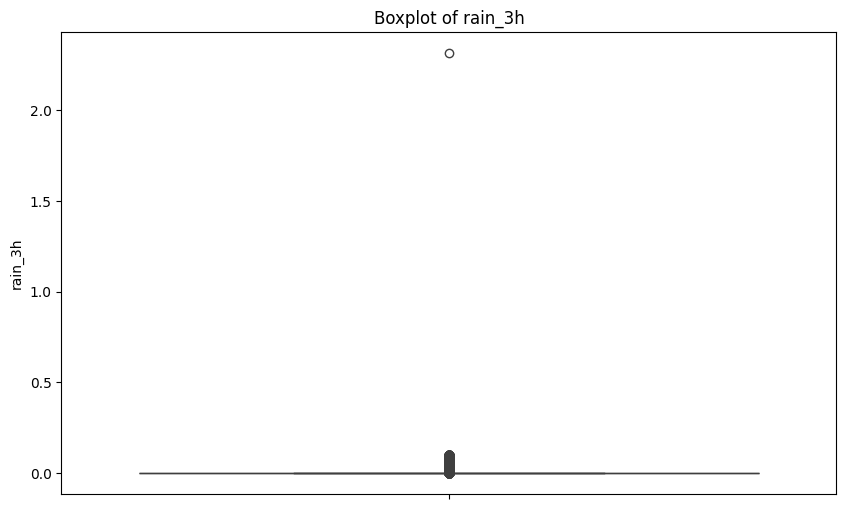

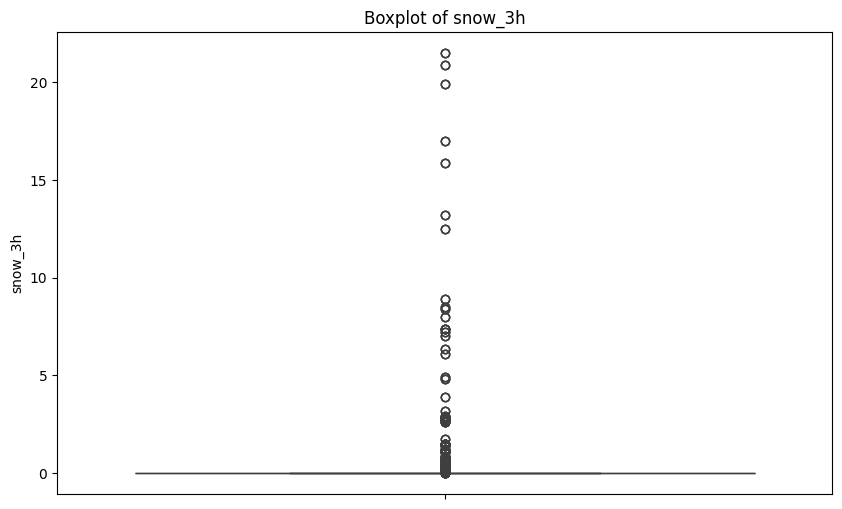

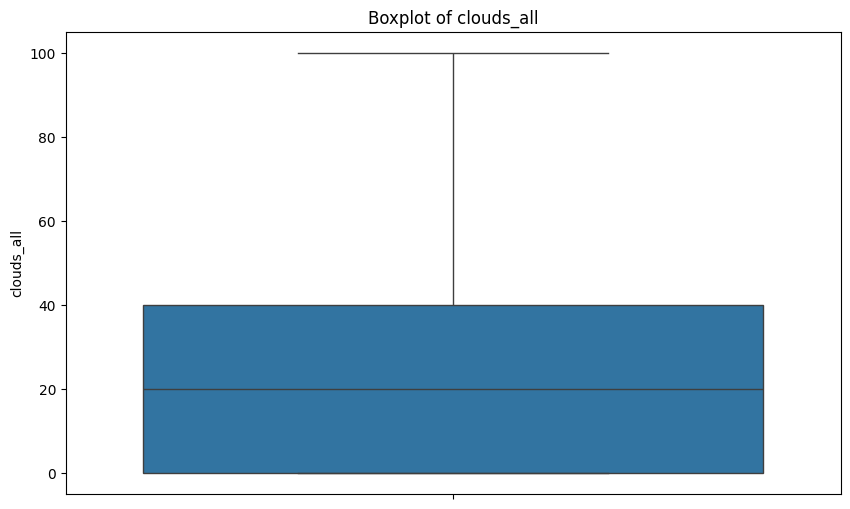

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns
numeric_columns = df_weather.select_dtypes(include=['float64', 'int64']).columns

# Generate a boxplot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_weather[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()



According to the boxplots populated; pressure, wind_speed, rain_1h, rain_3h, and snow_3h have outliers that will be removed from the code below.

In [ ]:
df_weather_cleaned = remove_outliers(df_weather)
df_weather_cleaned

city_name     temp  pressure  humidity  wind_speed  \
time                                                                           
2015-01-01 00:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 01:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 02:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 03:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 04:00:00+01:00  Valencia  269.686      1002        78           0   
...                             ...      ...       ...       ...         ...   
2018-12-31 19:00:00+01:00   Seville  287.760      1028        54           3   
2018-12-31 20:00:00+01:00   Seville  285.760      1029        62           3   
2018-12-31 21:00:00+01:00   Seville  285.150      1028        58           4   
2018-12-31 22:00:00+01:00   Seville  284.150      1029        57           4   
2018-12-31 23:00:00+01:00   Seville  283.970      1029        70           3   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
time                                                                        
2015-01-01 00:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        23      0.0      0.0      0.0           0  
...                             ...      ...      ...      ...         ...  
2018-12-31 19:00:00+01:00        30      0.0      0.0      0.0           0  
2018-12-31 20:00:00+01:00        30      0.0      0.0      0.0           0  
2018-12-31 21:00:00+01:00        50      0.0      0.0      0.0           0  
2018-12-31 22:00:00+01:00        60      0.0      0.0      0.0           0  
2018-12-31 23:00:00+01:00        50      0.0      0.0      0.0           0  

[173426 rows x 10 columns]

### Scale and Transform Weather Data

In [ ]:

weather_data_numerical = df_weather_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Applying MinMaxScaler to the numerical columns
scaler_weather = MinMaxScaler()
weather_data_normalized = df_weather_cleaned.copy()
weather_data_normalized[weather_data_numerical] = scaler_weather.fit_transform(df_weather_cleaned[weather_data_numerical])

# Calculating skewness of the numerical columns to identify the columns that are highly skewed
skewness_weather = weather_data_normalized[weather_data_numerical].apply(lambda x: skew(x.dropna()))
skewness_weather = skewness_weather.sort_values(ascending=False)

# Filtering columns with skewness greater than an absolute value of 1, indicating significant skew
highly_skewed_weather = skewness_weather[abs(skewness_weather) > 1]

# Applying Yeo-Johnson Transformation to the highly skewed columns in the weather dataset
for col in highly_skewed_weather.index:
    # Applying transformation
    weather_data_normalized[col], _ = yeojohnson(weather_data_normalized[col].fillna(weather_data_normalized[col].mean()))

# Recalculating skewness after transformation to check improvement for the weather dataset
new_skewness_weather = weather_data_normalized[highly_skewed_weather.index].apply(lambda x: skew(x))
new_skewness_weather = new_skewness_weather.sort_values(ascending=False)

# Displaying the first few rows of the normalized data and the new skewness values for the weather dataset
weather_data_normalized.head()


city_name      temp      pressure  humidity  \
time                                                                    
2015-01-01 00:00:00+01:00  Valencia  0.100977  5.899470e+07  0.762887   
2015-01-01 01:00:00+01:00  Valencia  0.100977  5.899470e+07  0.762887   
2015-01-01 02:00:00+01:00  Valencia  0.084552  5.992788e+07  0.773196   
2015-01-01 03:00:00+01:00  Valencia  0.084552  5.992788e+07  0.773196   
2015-01-01 04:00:00+01:00  Valencia  0.084552  5.992788e+07  0.773196   

                           wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
time                                                                         
2015-01-01 00:00:00+01:00       0.125  0.172222     -0.0     -0.0     -0.0   
2015-01-01 01:00:00+01:00       0.125  0.172222     -0.0     -0.0     -0.0   
2015-01-01 02:00:00+01:00       0.000  0.063889     -0.0     -0.0     -0.0   
2015-01-01 03:00:00+01:00       0.000  0.063889     -0.0     -0.0     -0.0   
2015-01-01 04:00:00+01:00       0.000  0.063889     -0.0     -0.0     -0.0   

                           clouds_all  
time                                   
2015-01-01 00:00:00+01:00         0.0  
2015-01-01 01:00:00+01:00         0.0  
2015-01-01 02:00:00+01:00         0.0  
2015-01-01 03:00:00+01:00         0.0  
2015-01-01 04:00:00+01:00         0.0

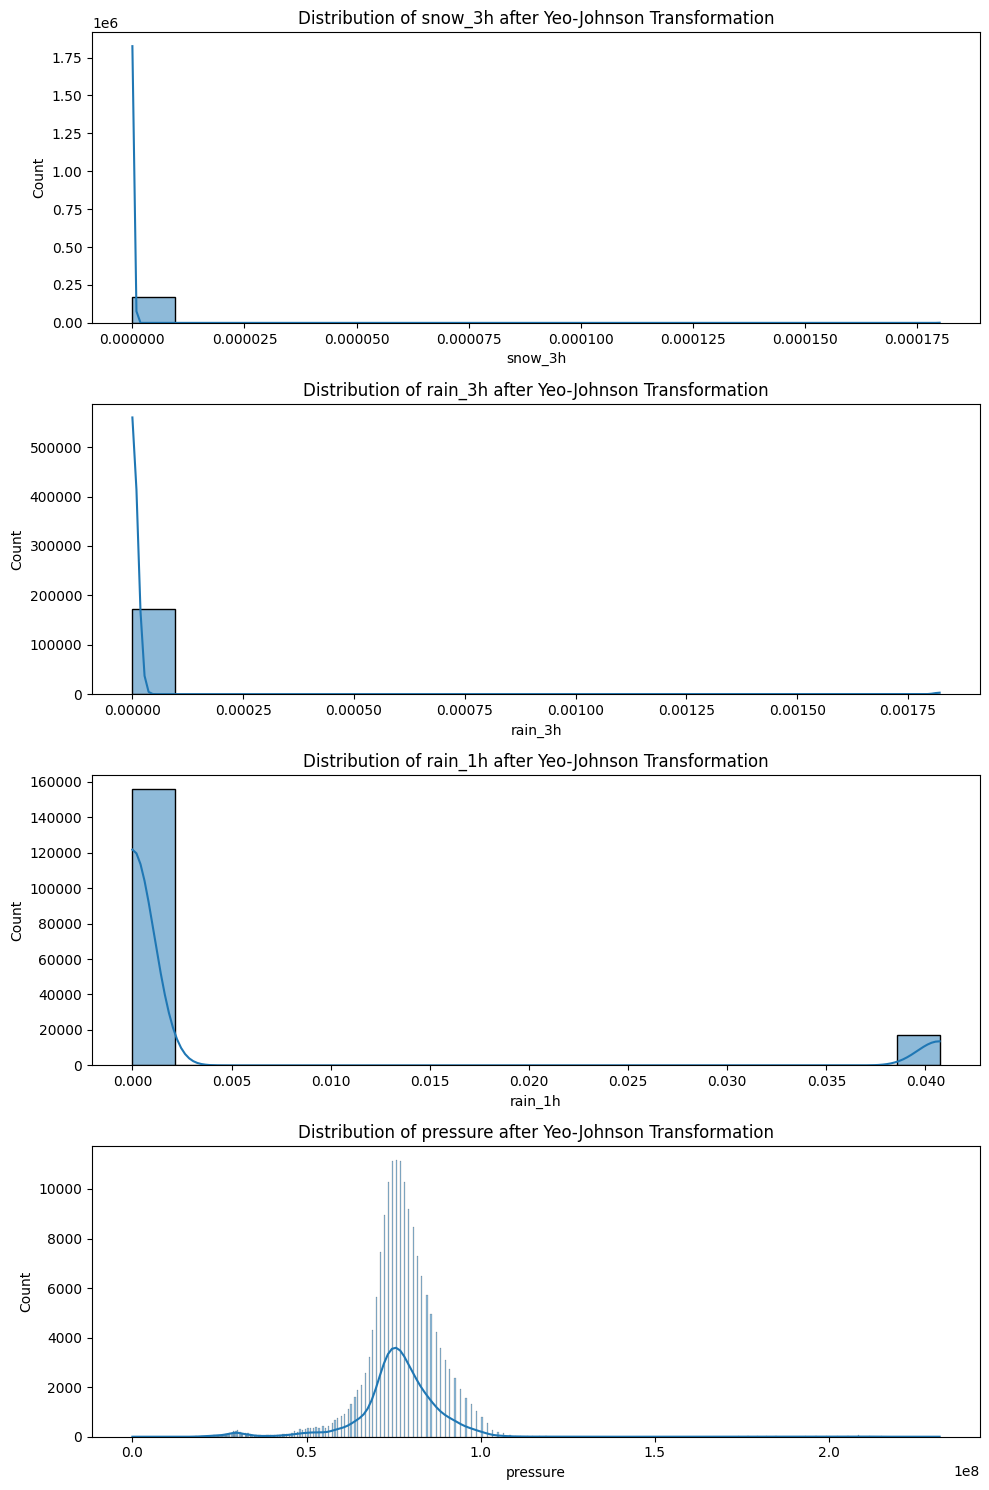

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the columns that underwent Yeo-Johnson transformation
fig, axes = plt.subplots(nrows=len(highly_skewed_weather.index), ncols=1, figsize=(10, 15))

for i, col in enumerate(highly_skewed_weather.index):
    sns.histplot(weather_data_normalized[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col} after Yeo-Johnson Transformation')

plt.tight_layout()
plt.show()


# Joining Dataframes

Since we have a common "time" variable between the two dataframes, we will combine them with this as the index for simplicity.

In [ ]:
pivot_df = weather_data_normalized.pivot_table(index='time', columns='city_name', values=['temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'snow_3h', 'clouds_all'])

# Flatten the multi-index columns
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

df_final = energy_data_normalized.join(pivot_df, how='inner')
df_final

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00            0.658019   
2015-01-01 01:00:00+01:00            0.662736   
2015-01-01 02:00:00+01:00            0.660377   
2015-01-01 03:00:00+01:00            0.636792   
2015-01-01 04:00:00+01:00            0.613208   
...                                       ...   
2018-12-31 19:00:00+01:00            0.304245   
2018-12-31 20:00:00+01:00            0.301887   
2018-12-31 21:00:00+01:00            0.292453   
2018-12-31 22:00:00+01:00            0.294811   
2018-12-31 23:00:00+01:00            0.287736   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                              0.329329   
2015-01-01 01:00:00+01:00                              0.328328   
2015-01-01 02:00:00+01:00                              0.323323   
2015-01-01 03:00:00+01:00                              0.254254   
2015-01-01 04:00:00+01:00                              0.187187   
...                                                         ...   
2018-12-31 19:00:00+01:00                              0.000000   
2018-12-31 20:00:00+01:00                              0.000000   
2018-12-31 21:00:00+01:00                              0.000000   
2018-12-31 22:00:00+01:00                              0.000000   
2018-12-31 23:00:00+01:00                              0.000000   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00               0.176731                     0.545420   
2015-01-01 01:00:00+01:00               0.181351                     0.536939   
2015-01-01 02:00:00+01:00               0.176911                     0.514583   
2015-01-01 03:00:00+01:00               0.168742                     0.456765   
2015-01-01 04:00:00+01:00               0.165636                     0.419376   
...                                          ...                          ...   
2018-12-31 19:00:00+01:00               0.203003                     0.263652   
2018-12-31 20:00:00+01:00               0.200437                     0.255685   
2018-12-31 21:00:00+01:00               0.198905                     0.237184   
2018-12-31 22:00:00+01:00               0.195295                     0.220609   
2018-12-31 23:00:00+01:00               0.198172                     0.204291   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00               0.065147   
2015-01-01 01:00:00+01:00               0.052117   
2015-01-01 02:00:00+01:00               0.048860   
2015-01-01 03:00:00+01:00               0.058632   
2015-01-01 04:00:00+01:00               0.045603   
...                                          ...   
2018-12-31 19:00:00+01:00               0.117264   
2018-12-31 20:00:00+01:00               0.104235   
2018-12-31 21:00:00+01:00               0.084691   
2018-12-31 22:00:00+01:00               0.068404   
2018-12-31 23:00:00+01:00               0.068404   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                     0.125515   
2015-01-01 01:00:00+01:00                                     0.128088   
2015-01-01 02:00:00+01:00                                     0.136356   
2015-01-01 03:00:00+01:00                                     0.143072   
2015-01-01 04:00:00+01:00                                     0.146666   
...                                                                ...   
2018-12-31 19:00:00+01:00                                     0.000349   
2018-12-31 20:00:00+01:00                                     0.000349   
2018-12-31 21:00:00+01:00                     

In [ ]:
check_Nans(df_final)

Number of Nans in each column :
generation biomass                                0
generation fossil brown coal/lignite              0
generation fossil gas                             0
generation fossil hard coal                       0
generation fossil oil                             0
generation hydro pumped storage consumption       0
generation hydro run-of-river and poundage        0
generation hydro water reservoir                  0
generation nuclear                                0
generation other                                  0
generation other renewable                        0
generation solar                                  0
generation waste                                  0
generation wind onshore                           0
total load forecast                               0
total load actual                                 0
price day ahead                                   0
price actual                                      0
clouds_all_ Barcelona           

In [ ]:
df_final.dropna(inplace=True)
check_Nans(df_final)

Number of Nans in each column :
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
clouds_all_ Barcelona                          0
clouds_all_Bilbao                    

# Stationarity

## ACF Plot

Next, we aim to see if the time series data is stationary. Stationarity is crucial in time series analysis as it impacts our capacity to create models and forecast future data points.

In [ ]:
import matplotlib.pyplot as plt

# Extract the first 300 rows for the 'max_temperature_v' feature
price_actual_data = df_final['price actual'].head(300)

<Figure size 1200x600 with 0 Axes>

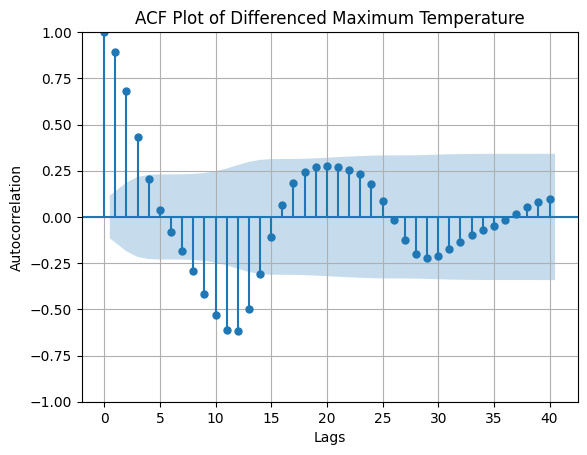

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Perform seasonal differencing to remove trend and seasonality (12-month cycle)
price_actual_diff = price_actual_data.diff(12).dropna()

# ACF plot for the differenced data
plt.figure(figsize=(12, 6))
plot_acf(price_actual_diff, lags=40, alpha=0.05)
plt.title('ACF Plot of Differenced Maximum Temperature')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

The ACF plot shows autocorrelations that are significant at specific lags that are multiples of a particular number suggesting seasonality. However, the plot does not show trends because most of the autocorrelations are within the confidence interval after the initial lags and the autocorrelations decline quickly rather than slowly. This suggests that the data might be stationary. We will investigate further with the Dickey Fuller test below.

## Dickey Fuller (ADF)

 To test for stationarity, the null hypothesis assumes the presence of a unit root in the time series, suggesting it's non-stationary. On the flip side, the alternative hypothesis is that the time series is indeed stationary. We determine the outcome by comparing the test statistic to the critical values. Should the p-value fall below the standard alpha = 0.05, we can reject the null hypothesis, leading to the conclusion that the time series does not have a unit root and is, therefore, stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_final["price actual"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.232839
p-value: 0.000000
Critical Test Statistics Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


From the test statistic, the value is less than the critical values compared to a more strongly non-stationary series,  According to the p-value of the dickey fuller test, we must reject the null hypothesis that the data is non-stationary at the level of significance at 0.05. Therefore, the test suggests strong evidence that the data is stationary.

The data shows to have no unit root and is stationary in terms of its mean(ADF test result).

## Plot Actual Price to observe seasonality and trends

In [ ]:
df_finalcopy = df_final.copy()
df_finalcopy['date'] = pd.to_datetime(df_finalcopy.index, utc=True)
df_finalcopy['year'] = df_finalcopy['date'].dt.year
df_finalcopy['month'] = df_finalcopy['date'].dt.month
df_finalcopy.head()


generation biomass  \
time                                            
2015-01-01 00:00:00+01:00            0.658019   
2015-01-01 01:00:00+01:00            0.662736   
2015-01-01 02:00:00+01:00            0.660377   
2015-01-01 03:00:00+01:00            0.636792   
2015-01-01 04:00:00+01:00            0.613208   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                              0.329329   
2015-01-01 01:00:00+01:00                              0.328328   
2015-01-01 02:00:00+01:00                              0.323323   
2015-01-01 03:00:00+01:00                              0.254254   
2015-01-01 04:00:00+01:00                              0.187187   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00               0.176731                     0.545420   
2015-01-01 01:00:00+01:00               0.181351                     0.536939   
2015-01-01 02:00:00+01:00               0.176911                     0.514583   
2015-01-01 03:00:00+01:00               0.168742                     0.456765   
2015-01-01 04:00:00+01:00               0.165636                     0.419376   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00               0.065147   
2015-01-01 01:00:00+01:00               0.052117   
2015-01-01 02:00:00+01:00               0.048860   
2015-01-01 03:00:00+01:00               0.058632   
2015-01-01 04:00:00+01:00               0.045603   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                     0.125515   
2015-01-01 01:00:00+01:00                                     0.128088   
2015-01-01 02:00:00+01:00                                     0.136356   
2015-01-01 03:00:00+01:00                                     0.143072   
2015-01-01 04:00:00+01:00                                     0.146666   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                    0.446647   
2015-01-01 01:00:00+01:00                                    0.422157   
2015-01-01 02:00:00+01:00                                    0.401166   
2015-01-01 03:00:00+01:00                                    0.387172   
2015-01-01 04:00:00+01:00                                    0.389504   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                          0.218364   
2015-01-01 01:00:00+01:00                          0.188257   
2015-01-01 02:00:00+01:00                          0.152405   
2015-01-01 03:00:00+01:00                          0.078451   
2015-01-01 04:00:00+01:00                          0.071081   

                           generation nuclear  generation other  ...  \
time                                                             ...   
2015-01-01 00:00:00+01:00            0.993677           0.38835  ...   
2015-01-01 01:00:00+01:00            0.993677           0.38835  ...   
2015-01-01 02:00:00+01:00            0.994581           0.38835  ...   
2015-01-01 03:00:00+01:00            0.994280           0.38835  ...   
2015-01-01 04:00:00+01:00            0.993978           0.38835  ...   

                           wind_deg_Seville  wind_deg_Valencia  \
time                                                             
2015-01-01 00:00:00+01:00          0.058333           0.172222   
2015-01-01 01:00:00+01:00          0.058333           0.172222   
2015-01-01 02:00:00+01:00          0.0

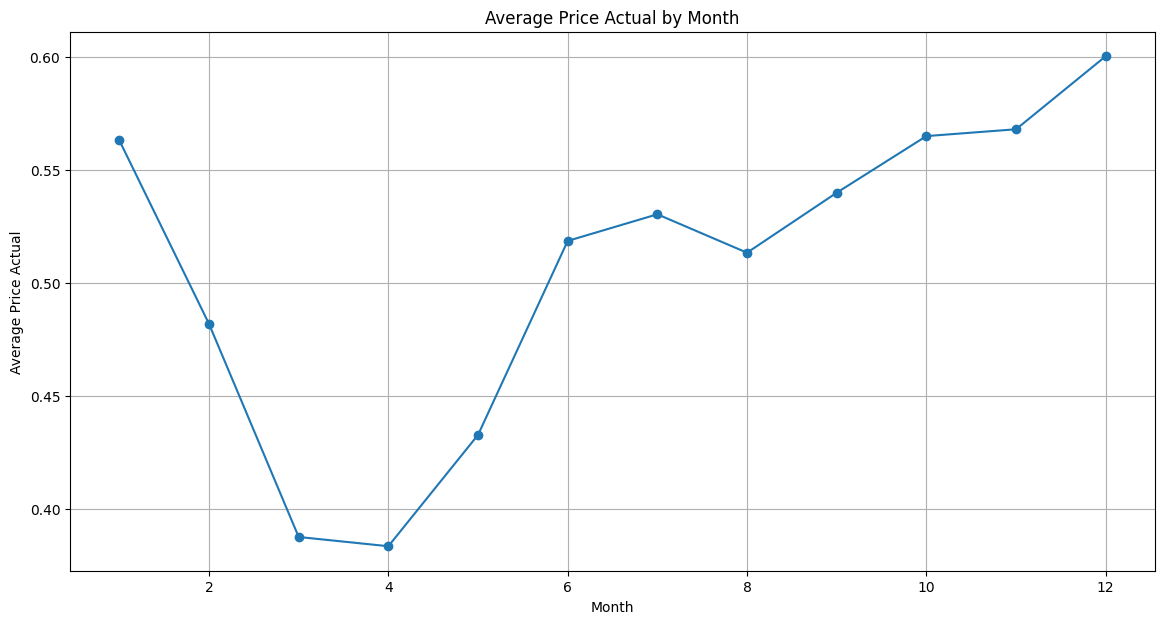

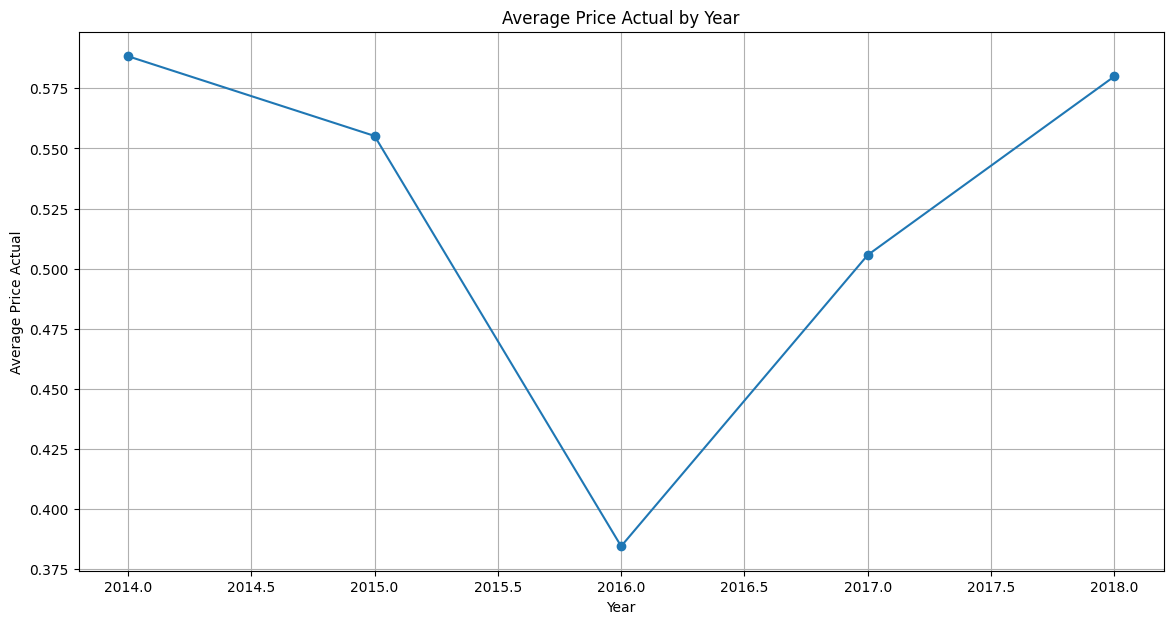

In [ ]:
import matplotlib.pyplot as plt

# Plot the monthly trend for 'price actual'
monthly_price = df_finalcopy.groupby('month')['price actual'].mean()

plt.figure(figsize=(14, 7))
monthly_price.plot(marker='o', linestyle='-')
plt.title('Average Price Actual by Month')
plt.xlabel('Month')
plt.ylabel('Average Price Actual')
plt.grid(True)
plt.show()

# Plot the yearly trend for 'price actual'
yearly_price = df_finalcopy.groupby('year')['price actual'].mean()

plt.figure(figsize=(14, 7))
yearly_price.plot(marker='o', linestyle='-')
plt.title('Average Price Actual by Year')
plt.xlabel('Year')
plt.ylabel('Average Price Actual')
plt.grid(True)
plt.show()


According to the monthly and yearly plots of price actual there is no observed trends nor potential seasonality, which suggests that the data for the price actual is stationary.

# Lasso

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


X = df_final.drop('price actual', axis=1)
y = df_final['price actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

# testing the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train, mse_test, r2_train, r2_test

(0.022237766224300008,
 0.022768515531189276,
 0.12687167474842476,
 0.12428120448639801)

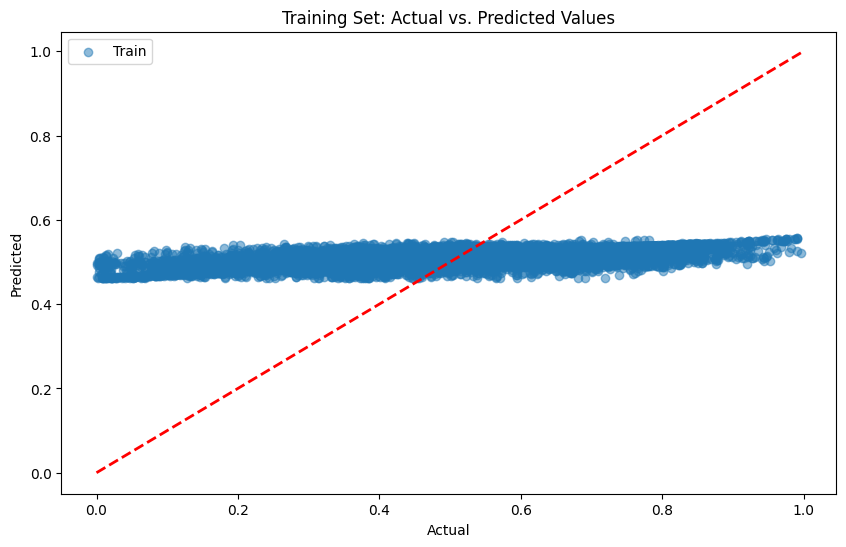

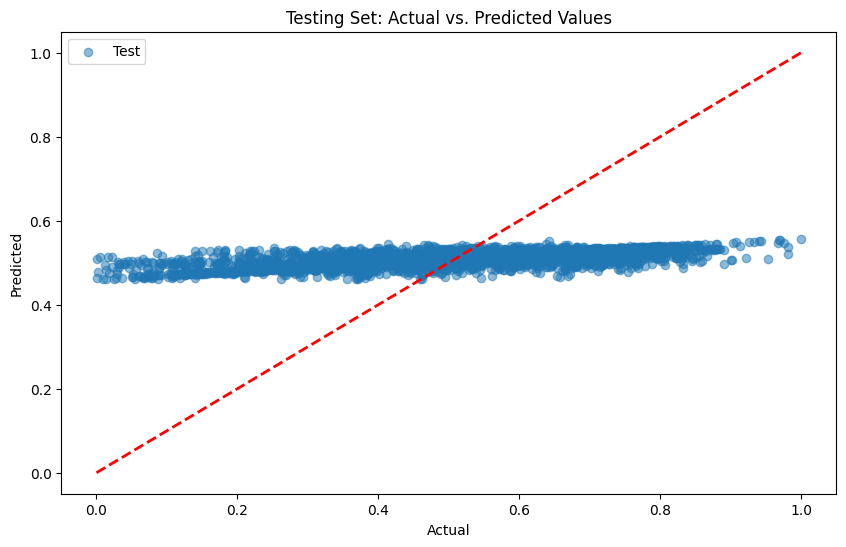

In [ ]:
# Plotting for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs. Predicted Values')
plt.legend()
plt.show()

# Plotting for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Set: Actual vs. Predicted Values')
plt.legend()
plt.show()

The first attempt with Lasso regression, using a fixed $\alpha$ of 0.1, showed very low performance, with $R^{2}$ values of 0.12687 and 0.12428 for both training and testing sets respectively. The mean squared error was similar for both sets with values of 0.02223 for training and 0.02276 for testing, indicating consistent but ineffective predictions. Lastly, from the graphs we can see that there is a very poor relationship between actual and predicted values, also indicating poor perfomance. This suggested the chosen alpha was not suitable for capturing the varience of the data.

### Lasso with CV

In [ ]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=42)

#CV
lasso_cv.fit(X_train_scaled, y_train)

# Optimal alpha
optimal_alpha = lasso_cv.alpha_

# Retrain the model with the optimal alpha
lasso_optimal = Lasso(alpha=optimal_alpha)
lasso_optimal.fit(X_train_scaled, y_train)

# Predictions with the optimal model
y_pred_train_opt = lasso_optimal.predict(X_train_scaled)
y_pred_test_opt = lasso_optimal.predict(X_test_scaled)

#Testing model
mse_train_opt = mean_squared_error(y_train, y_pred_train_opt)
mse_test_opt = mean_squared_error(y_test, y_pred_test_opt)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

optimal_alpha, mse_train_opt, mse_test_opt, r2_train_opt, r2_test_opt

(0.00011502740340716879,
 0.009675397779856399,
 0.009646035640400622,
 0.6201118505132255,
 0.6289958077889813)

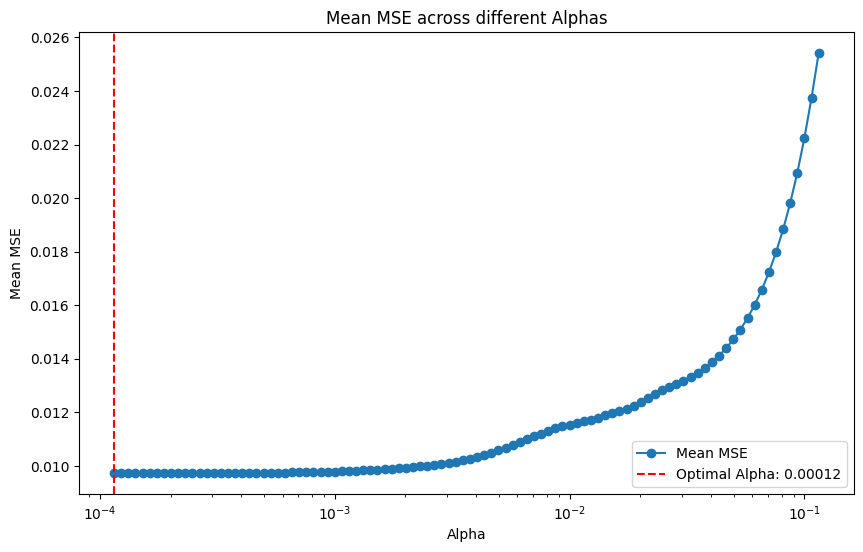

In [ ]:
alphas = lasso_cv.alphas_
mse_path = lasso_cv.mse_path_.mean(axis=1)
optimal_alpha = lasso_cv.alpha_

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_path, '-o', label='Mean MSE')
plt.axvline(optimal_alpha, color='r', linestyle='--', label=f'Optimal Alpha: {optimal_alpha:.5f}')
plt.xlabel('Alpha')
plt.ylabel('Mean MSE')
plt.xscale('log')
plt.title('Mean MSE across different Alphas')
plt.legend()
plt.show()

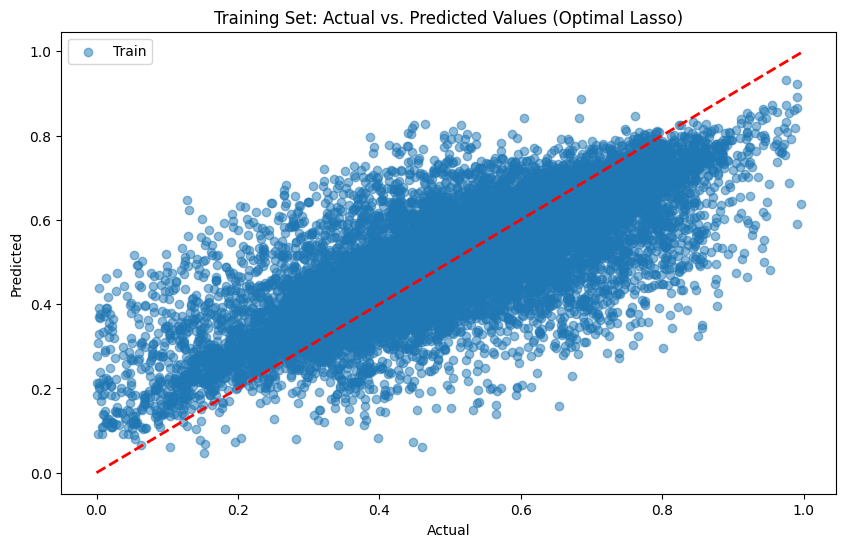

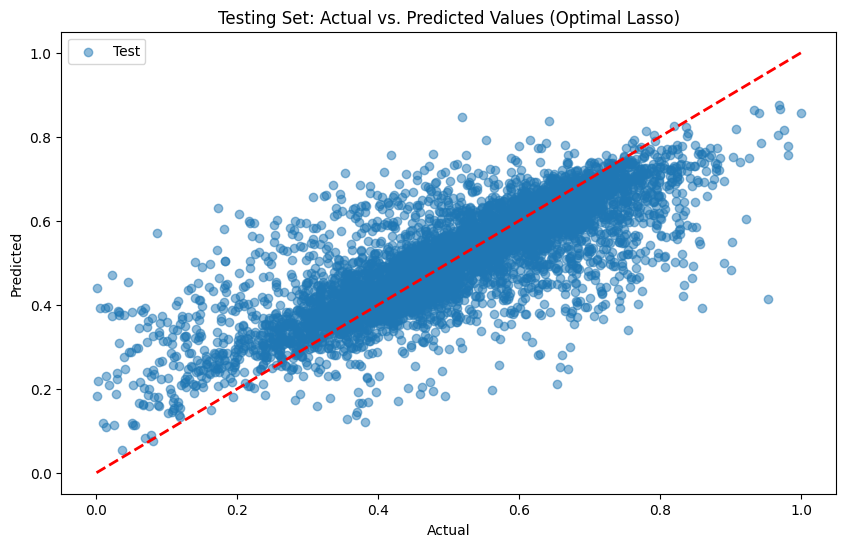

In [ ]:
# Plotting for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_opt, alpha=0.5, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs. Predicted Values (Optimal Lasso)')
plt.legend()
plt.show()

# Plotting for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_opt, alpha=0.5, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Set: Actual vs. Predicted Values (Optimal Lasso)')
plt.legend()
plt.show()

Switching to LassoCV for automatic alpha selection greatly improved the model. It found an optimal $\alpha$ of 0.00012, significantly lower than the initial choice. This adjustment led to a substantial increase in the $R^{2}$ scores for both training (0.6201) and test datasets (0.6289), indicating a much better model fit and predictive accuracy.The MSE also decreased significantly for both training (0.0096) and test sets (0.0096), reflecting the model's improved predictive accuracy with the optimal alpha value. Lastly from the graphs we can see an improved relationship between actual and predicted values in both the test and training set.

In [ ]:
#lasso feature selection
features_selected = X.columns[lasso_optimal.coef_ != 0]

features_selected

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'clouds_all_ Barcelona', 'clouds_all_Bilbao',
       'clouds_all_Madrid', 'clouds_all_Seville', 'clouds_all_Valencia',
       'humidity_ Barcelona', 'humidity_Bilbao', 'humidity_Madrid',
       'humidity_Seville', 'humidity_Valencia', 'pressure_ Barcelona',
       'pressure_Bilbao', 'pressure_Madrid', 'pressure_Seville',
       'pressure_Valencia', 'rain_1h_ Barcelona', 'rain_1h_Bilbao',
       'rain_1h_Madrid', 'rain_1h_Seville', 'rain_1h_Valencia',
       'snow_3h_Bilbao', 'temp_ Barcel

This indicates that the optimal model found these predictors to be significant in forecasting the target variable, 'price actual', suggesting their relevance in understanding and predicting electricity prices.

### Summary
Applying LassoCV marked a significant turning point by optimizing alpha automatically, which enhanced model performance and accuracy. The selected features reveal the intricate interplay of variables influencing the target variable.The model's feature selection outcomes provide insightful implications for forecasting. This suggests that accurate forecasting could just involve these variables and thereby simplifyting the model.

# Forecasting

To forecast the electricity pricing according to the historical data we will implement forecasting techniques such as regression modeling and neural networks.

## Decision Tree

 We chose this model because it is a type of predictive modeling and is used for forecasting continuous target variables. This regression model segments the set of possible values for input variables into distinct regions. The observation will be put into a distinct region, and the prediction is the mean or median of the target variable for the training observations in that region.

MAE: 0.05438579197297947, MSE: 0.0096678828080661, R^2: 0.6281555257193318


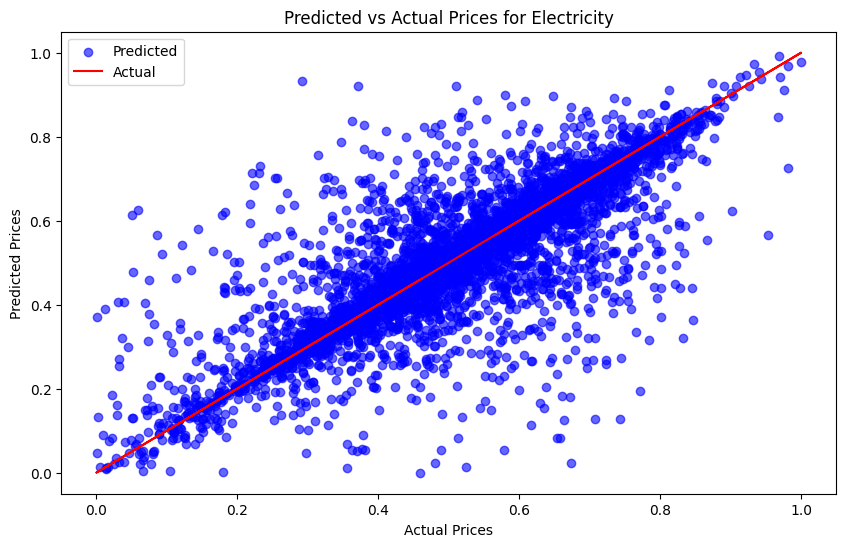

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into features and target variable
X = df_final[features_selected]  # Features
y = df_final['price actual']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R^2: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Predicted vs Actual Prices for Electricity')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


Our MAE(0.054385) and MSE(0.0096678) values were low which indicates that our predicted values are close to the actual. The decision tree regression had an R^2 of 0.6281 which tells us that 62.81% of the variance in the dependent variable can be explained by the independent variables in our model. This also suggests that our model fit is moderately good.


## CNN

The fundamental idea behind applying the Convolutional Neural Network (CNN) model to this regression problem is its ability to detect and leverage local patterns within the input data. CNNs utilize convolutional layers to automatically and adaptively learn spatial hierarchies of features from input data, which, in the context of time series, can capture trends, seasonality, and other characteristics. It can be particularly effective when the dataset exhibits strong local temporal correlations that the convolutional layers can exploit.

Epoch 1/100
729/729 [==============================] - 3s 3ms/step - loss: 0.0150
Epoch 2/100
729/729 [==============================] - 3s 4ms/step - loss: 0.0112
Epoch 3/100
729/729 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 4/100
729/729 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 5/100
729/729 [==============================] - 2s 3ms/step - loss: 0.0095
Epoch 6/100
729/729 [==============================] - 3s 4ms/step - loss: 0.0090
Epoch 7/100
729/729 [==============================] - 3s 4ms/step - loss: 0.0087
Epoch 8/100
729/729 [==============================] - 2s 3ms/step - loss: 0.0086
Epoch 9/100
729/729 [==============================] - 2s 3ms/step - loss: 0.0084
Epoch 10/100
729/729 [==============================] - 2s 3ms/step - loss: 0.0083
Epoch 11/100
729/729 [==============================] - 3s 4ms/step - loss: 0.0081
Epoch 12/100
729/729 [==============================] - 2s 3ms/step - loss: 0.0080
Epoch 13/100


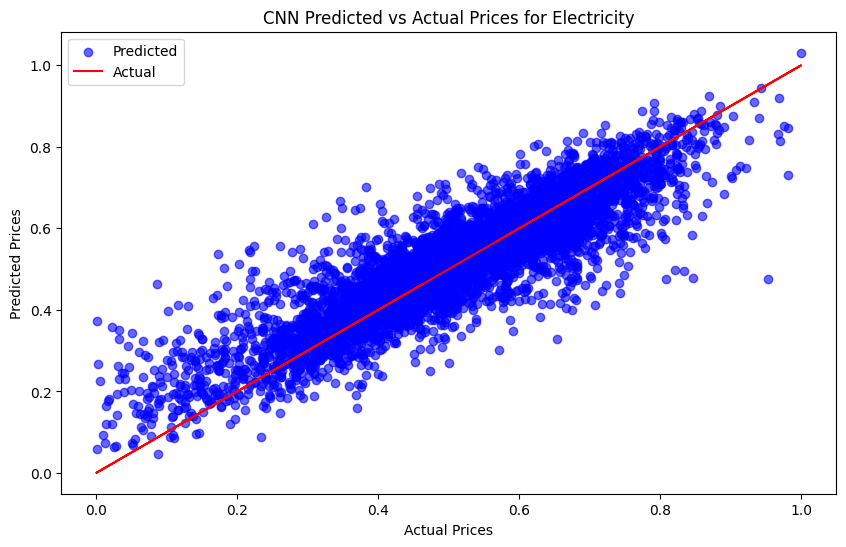

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_final[features_selected]
y = df_final['price actual'].values

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape X_scaled to fit the CNN input requirements ([samples, timesteps, features])
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# CNN Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R^2: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred.flatten(), alpha=0.6, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('CNN Predicted vs Actual Prices for Electricity')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

The plot reveals a clustering of predicted values around the line representing perfect prediction alignment with actual prices, which suggests a good fit for many data points.

An MAE value of 0.0555 signifies that on average, the model's predictions deviate from the actual prices by this magnitude. The low MSE of 0.0057 indicates that there are not many large deviations in the predictions.The R² value, here approximately 0.7785, indicates that around 77.85% of the variance in the actual electricity prices is accounted for by the model.

## XG Boost

The strength of XGBoost, a powerful and efficient implementation of gradient boosting machines, lies in its capacity to automatically manage missing data, capture non-linearities and interactions, and prevent overfitting through regularization.

MAE: 0.05423827332771879, MSE: 0.0064762561464889795, R^2: 0.7509113308563311


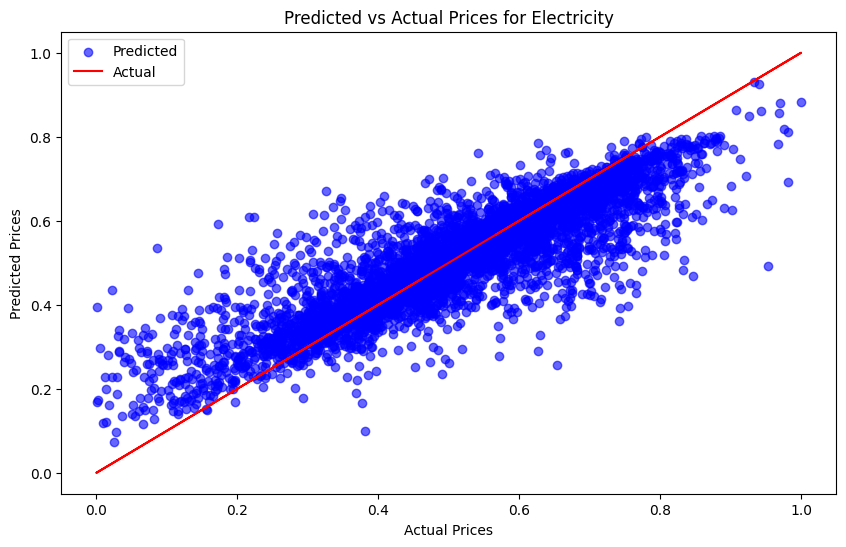

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

X = df_final[features_selected]
y = df_final['price actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regr_boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.02, max_depth=4, random_state=1)
regr_boost.fit(X_train, y_train)

y_pred = regr_boost.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R^2: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Predicted vs Actual Prices for Electricity')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

An MAE value of 0.0542 signifies that on average, the model's predictions deviate from the actual prices by this magnitude. The low MSE of 0.0065 indicates that there are not many large deviations in the predictions.The R² value, here approximately 0.7509, indicates that around 75.09% of the variance in the actual electricity prices is accounted for by the model.

## LSTM

We chose LSTM because it leverages the order and timing of past data points which is why it fits our time series data for predicting electricity pricing. LSTM is also capable of feature learning which is important for the prediction task. This reduces the need for manual feature selection such as Lasso. Since we have a large dataset it was fit for LSTM.



Epoch 1/100
729/729 - 16s - loss: 0.0186 - mean_absolute_error: 0.0899 - mean_squared_error: 0.0186 - val_loss: 0.0080 - val_mean_absolute_error: 0.0641 - val_mean_squared_error: 0.0080 - 16s/epoch - 22ms/step
Epoch 2/100
729/729 - 5s - loss: 0.0071 - mean_absolute_error: 0.0610 - mean_squared_error: 0.0071 - val_loss: 0.0068 - val_mean_absolute_error: 0.0590 - val_mean_squared_error: 0.0068 - 5s/epoch - 6ms/step
Epoch 3/100
729/729 - 5s - loss: 0.0062 - mean_absolute_error: 0.0569 - mean_squared_error: 0.0062 - val_loss: 0.0064 - val_mean_absolute_error: 0.0561 - val_mean_squared_error: 0.0064 - 5s/epoch - 7ms/step
Epoch 4/100
729/729 - 4s - loss: 0.0056 - mean_absolute_error: 0.0542 - mean_squared_error: 0.0056 - val_loss: 0.0061 - val_mean_absolute_error: 0.0562 - val_mean_squared_error: 0.0061 - 4s/epoch - 5ms/step
Epoch 5/100
729/729 - 3s - loss: 0.0051 - mean_absolute_error: 0.0516 - mean_squared_error: 0.0051 - val_loss: 0.0055 - val_mean_absolute_error: 0.0534 - val_mean_square

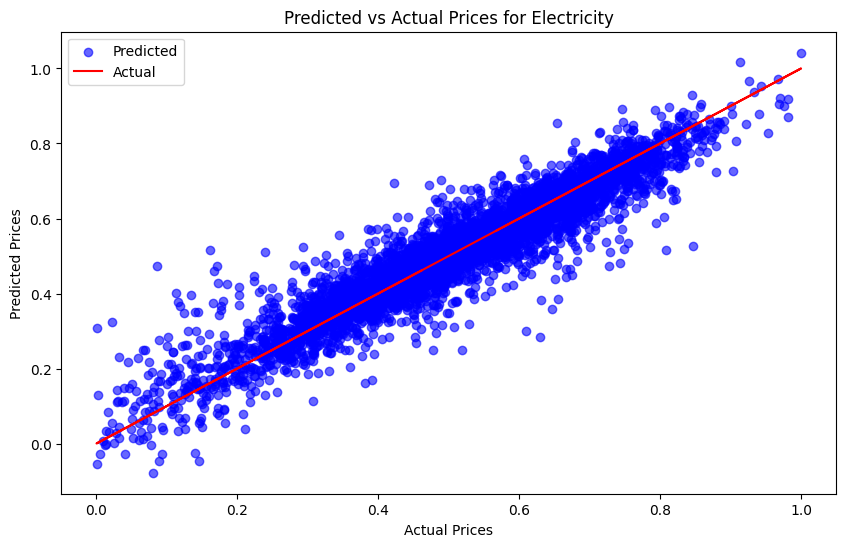

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

X = df_final[features_selected]
y = df_final['price actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize the LSTM model with the correct input shape from X_train_reshaped
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    LSTM(units=50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError(), MeanSquaredError()])

# Train the model using the reshaped and scaled training data
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)

y_pred = model.predict(X_test_reshaped)
y_pred = y_pred.flatten()
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean(np.square(y_test - y_pred))
r2 = r2_score(y_test, y_pred)
print(mae, mse, r2)

# Plotting Predicted vs Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Predicted vs Actual Prices for Electricity')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

For LSTM we calculated a low MAE(0.0373) AND MSE( 0.00290), which indicates that the predicted values are close to the actual values. The LSTM had an $R^{2}$ of 0.8884 which tells us that 88.84% of the variance in the dependent variable can be explained by the independent variables in our model. This also suggests that our model is fit and is good.

# Future Work

While our investigation into forecasting methods has been comprehensive, there's always room for further exploration. The XG Boost model was an idea we had for future work, and since presenting we decided to attempt applying the XGBoost model to forecast energy prices. The results have been impressive, making it one of our top-performing models with an R-squared value of 75% and a (MSE) of 0.0074. XGBoost excels in handling various types of data, and data with complex relationships between features. Our model had many features and due to its gradient boosting capabilities, this model was able to better reflect the data.

Another model worth exploring is logistic regression. Although primarily used for classification problems, logistic regression can be adapted for time series forecasting by treating the prediction as a classification of rise or fall in values. This approach could provide insights into trend changes rather than exact numerical forecasts, offering a different perspective on energy price movements.

Lastly of neural networks with combinations boosting methods, such as the Hybrid GRU-XG Boost and Hybrid LSTM-Attention-XG Boost models, presents a new approach. Considering our success with the solo XG Boost, these models are quite promising. These hybrid models are beneficial for capturing complex temporal dependencies and nonlinearities in the data, making them good candidates for our future work in energy price forecasting.


# Conclusion




In conclusion, our investigation has been thorough and detailed. Yet, it's important to acknowledge the significant limitations and caveats related to our work. Energy markets are very volatile, and influenced by many factors that our model does not account for. Despite having over 50 features into our comprehensive model, critical elements such as the global economic landscape are omitted. More so, unpredictable or unquantifiable events, including political events or natural disasters, are beyond our model's scope. These exclusions highlight why accurately forecasting energy prices in so challenging, there is too many external factors to account for. As a result, we recognize and are content that our best model's results, accounting for approximately 88% of the variance in the ‘price actual’ prediction can be explained by the independent variables.